In [1]:
import traceback
import pandas as pd
import numpy as np
import gc4eptn
from gc4eptn.dataloaders import (
    PMUDataRTDSV5,
    NovicePMUDataRTDSV5,
    IntermediatePMUDataRTDSV5,
)
from gc4eptn.utils.plotting import plot_ground_truth
%load_ext autoreload
%autoreload 2

In [2]:
def print_pmuds_vars(pmuds):
    print(f'nodes: {pmuds.n_nodes}')
    print(f'edges: {pmuds.edges}',)
    print(f'PMUs: {pmuds.n_pmus}',)
    print(f'features:\n{pmuds.nodes}\n{pmuds.n_features}', )

def print_pmuds_info(pmuds):
    print_pmuds_vars(pmuds)
    print(f"Transmission:\n{pmuds.transmission}")
    print(f"Generators:\n{pmuds.generators}")
    print(f"Transformers:\n{pmuds.transformers}")
    print(f"Distribution:\n{pmuds.distribution}")

def checks(n_nodes, edges, n_features):
    assert pmuds.n_nodes == n_nodes
    assert pmuds.edges == edges
    assert sum(pmuds.n_features) == n_features

In [3]:
# Data Params
load_type = 'high'
topology = 'complete'

# Raw

**WARNING: Generator (and distribution?) ins/outs and connected nodes are incorrect. This is a data level issue.**

### All Loads, All features

In [4]:
pmuds = PMUDataRTDSV5(
    load=['high', 'medium', 'low'],
    topology=topology,
    drop_current=False, 
    drop_distribution=False,
    drop_generators=False,
    drop_parallel_currents=False,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=13, edges=14, n_features=82)
assert pmuds.df.shape == (5406, 83)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (13, 54060)

nodes: 13
edges: 14
PMUs: 28
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13']
[ 4  4  4  4  6  8 10 10 10  8  6  4  4]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS5_03_I_ang' 'BUS5_03_I_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS6_03_I_ang' 'BUS6_03_I_mag' 'BUS6_04_I_ang' 'BUS6_04_I_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS7_02_I_ang' 'BUS7_02_I_mag'
 'BUS7_04_I_ang' 'BUS7_04_I_mag' 'BUS7_05_I_ang' 'BUS7_05_I_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS8_02_I_ang' 'BUS8_02_I_mag'
 'BUS8_03_I_ang' 'BUS8_03_I_mag' 'BUS8_04_I_ang' 'BUS8_04_I_mag'
 'BUS8_05_I_ang' 'BUS8_05_I_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag'
 'BUS9_02_I_ang' 'BUS9_02_I_mag' 'BUS9_03_I_ang' 'BUS9_03_I_mag'
 'BUS9_04_I_ang' 'BUS9_04_I_mag']
Generators:
['BUS1_01_V_ang' 'BUS1_01_V_mag' 'BUS

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS11_03_I_ang,BUS11_03_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.005170,21123.56055,0,...,0.284445,1803.762207,0.558900,127607.1406,3.597451,2539.268555,0.081219,128984.5703,3.166282,4573.414551
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.005170,21123.53516,0,...,0.284445,1803.760010,0.558900,127606.9922,3.597451,2539.265625,0.081219,128984.4219,3.166281,4573.409180
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.005170,21123.55469,0,...,0.284445,1803.761719,0.558900,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.005170,21123.53711,0,...,0.284445,1803.760376,0.558900,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.005170,21123.54492,0,...,0.284445,1803.760864,0.558900,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,59.8401,0.390139,11919.88477,0.264118,14208.60742,0.288241,11699.08398,0.215668,17245.29297,0,...,0.394674,1399.520996,0.604636,133303.2031,3.639491,1760.284668,0.186941,134854.3906,3.277557,3638.007813
5402,59.8734,0.390138,11919.88477,0.264118,14208.60742,0.288241,11699.08496,0.215668,17245.29297,0,...,0.394674,1399.520996,0.604636,133303.2031,3.639491,1760.284790,0.186941,134854.3906,3.277557,3638.007813
5403,59.9067,0.390139,11919.88184,0.264118,14208.60352,0.288241,11699.08105,0.215668,17245.28711,0,...,0.394674,1399.520508,0.604636,133303.1719,3.639491,1760.284180,0.186941,134854.3438,3.277557,3638.006836
5404,59.9400,0.390139,11919.88965,0.264118,14208.61426,0.288241,11699.08984,0.215668,17245.30078,0,...,0.394674,1399.521606,0.604636,133303.2656,3.639491,1760.285522,0.186941,134854.4531,3.277557,3638.009521


,01_V_ang_0,01_V_mag_0,02_I_ang_0,02_I_mag_0,03_I_ang_0,03_I_mag_0,04_I_ang_0,04_I_mag_0,05_I_ang_0,05_I_mag_0,...,01_V_ang_5405,01_V_mag_5405,02_I_ang_5405,02_I_mag_5405,03_I_ang_5405,03_I_mag_5405,04_I_ang_5405,04_I_mag_5405,05_I_ang_5405,05_I_mag_5405
BUS1,0.470849,11902.43848,0.241548,20307.919920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.390139,11919.87793,0.264118,14208.601560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS2,0.300488,11671.10645,0.005170,21123.560550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288241,11699.07910,0.215668,17245.285160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS3,0.000000,11902.49121,-0.210902,20759.839840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11917.23730,-0.100675,16107.341800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS4,-0.177758,11671.20117,-0.430665,20845.720700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.137752,11700.34863,-0.150081,15742.400390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS5,0.881667,133655.00000,0.736895,1764.496216,0.736893,1764.471191,0.000000,0.000000,0.000000,0.000000,...,0.834432,135723.23440,0.759467,1234.544189,0.759466,1234.518677,0.000000,0.000000,0.000000,0.000000
BUS6,0.705696,129874.31250,0.500518,1835.364746,3.872345,1765.115723,0.613379,3576.634766,0.000000,0.000000,...,0.713432,133749.40630,0.711017,1498.392822,-2.391135,1234.715454,0.728835,2732.556641,0.000000,0.000000
BUS7,0.558900,127607.14060,3.753784,3576.714111,0.455858,2539.268555,0.529491,523.139771,0.529491,523.139832,...,0.604636,133303.14060,-2.414368,2732.246338,0.497899,1760.283936,0.623002,480.819488,0.623002,480.819580
BUS8,0.317674,125985.33590,3.583261,520.976013,3.583261,520.976074,0.441673,520.956848,0.441673,520.956970,...,0.393484,132566.04690,-2.618947,477.248657,-2.618947,477.248718,0.522652,477.228516,0.522652,477.228577
BUS9,0.081219,128984.57030,3.495655,511.760559,3.495655,511.760620,3.311736,3594.632080,0.024689,4573.414551,...,0.186941,134854.32810,-2.719798,468.370911,-2.719798,468.370972,-2.776966,2765.826660,0.135964,3638.006104
BUS10,0.228098,130584.58590,0.171335,3594.705322,0.064682,1811.224121,3.420001,1804.129395,0.000000,0.000000,...,0.296159,134497.96880,0.366222,2766.383301,0.345268,1367.811523,-2.754888,1399.190796,0.000000,0.000000


In [5]:
parallel_cols_I = np.array([40, 41, 46, 47, 50, 51, 56, 57])-1
pmuds.df.iloc[:, parallel_cols_I].columns

Index(['BUS7_05_I_ang', 'BUS7_05_I_mag', 'BUS8_03_I_ang', 'BUS8_03_I_mag',
       'BUS8_05_I_ang', 'BUS8_05_I_mag', 'BUS9_03_I_ang', 'BUS9_03_I_mag'],
      dtype='object')

In [6]:
gen_cols_I = np.array([20, 21, 26, 27, 74, 75, 66, 67])-1
pmuds.df.iloc[:, gen_cols_I].columns

Index(['BUS5_02_I_ang', 'BUS5_02_I_mag', 'BUS6_02_I_ang', 'BUS6_02_I_mag',
       'BUS11_03_I_ang', 'BUS11_03_I_mag', 'BUS10_03_I_ang', 'BUS10_03_I_mag'],
      dtype='object')

In [7]:
dist_cols_I = np.array([36, 37, 60, 61])-1
pmuds.df.iloc[:, dist_cols_I].columns

Index(['BUS7_03_I_ang', 'BUS7_03_I_mag', 'BUS9_05_I_ang', 'BUS9_05_I_mag'], dtype='object')

In [8]:
pmuds.node_info

{'BUS1': {'ins': array([], dtype=object),
  'n_ins': 0,
  'unknown': array([], dtype=object),
  'n_unknown': np.int64(0),
  'outs': array(['BUS1_02_I_ang', 'BUS1_02_I_mag'], dtype='<U13'),
  'n_outs': 1,
  'features': array(['BUS1_01_V_ang', 'BUS1_01_V_mag', 'BUS1_02_I_ang', 'BUS1_02_I_mag'],
        dtype=object),
  'current': array(['BUS1_02_I_ang', 'BUS1_02_I_mag'], dtype='<U13'),
  'voltage': array(['BUS1_01_V_ang', 'BUS1_01_V_mag'], dtype='<U13'),
  'edges': np.int64(1)},
 'BUS2': {'ins': array([], dtype=object),
  'n_ins': 0,
  'unknown': array([], dtype=object),
  'n_unknown': np.int64(0),
  'outs': array(['BUS2_02_I_ang', 'BUS2_02_I_mag'], dtype='<U13'),
  'n_outs': 1,
  'features': array(['BUS2_01_V_ang', 'BUS2_01_V_mag', 'BUS2_02_I_ang', 'BUS2_02_I_mag'],
        dtype=object),
  'current': array(['BUS2_02_I_ang', 'BUS2_02_I_mag'], dtype='<U13'),
  'voltage': array(['BUS2_01_V_ang', 'BUS2_01_V_mag'], dtype='<U13'),
  'edges': np.int64(1)},
 'BUS3': {'ins': array(['BUS3_02_I_a

## Load Type

### All Features

In [9]:
pmuds = PMUDataRTDSV5(
    load=load_type,
    topology=topology,
    drop_current=False, 
    drop_distribution=False,
    drop_generators=False,
    drop_parallel_currents=False,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=13, edges=14, n_features=82)
assert pmuds.df.shape == (1802, 83)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (13, 18020)

nodes: 13
edges: 14
PMUs: 28
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13']
[ 4  4  4  4  6  8 10 10 10  8  6  4  4]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS5_03_I_ang' 'BUS5_03_I_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS6_03_I_ang' 'BUS6_03_I_mag' 'BUS6_04_I_ang' 'BUS6_04_I_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS7_02_I_ang' 'BUS7_02_I_mag'
 'BUS7_04_I_ang' 'BUS7_04_I_mag' 'BUS7_05_I_ang' 'BUS7_05_I_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS8_02_I_ang' 'BUS8_02_I_mag'
 'BUS8_03_I_ang' 'BUS8_03_I_mag' 'BUS8_04_I_ang' 'BUS8_04_I_mag'
 'BUS8_05_I_ang' 'BUS8_05_I_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag'
 'BUS9_02_I_ang' 'BUS9_02_I_mag' 'BUS9_03_I_ang' 'BUS9_03_I_mag'
 'BUS9_04_I_ang' 'BUS9_04_I_mag']
Generators:
['BUS1_01_V_ang' 'BUS1_01_V_mag' 'BUS

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS11_03_I_ang,BUS11_03_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.00517,21123.56055,0,...,0.284445,1803.762207,0.5589,127607.1406,3.597451,2539.268555,0.081219,128984.5703,3.166282,4573.414551
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.00517,21123.53516,0,...,0.284445,1803.760010,0.5589,127606.9922,3.597451,2539.265625,0.081219,128984.4219,3.166281,4573.409180
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.00517,21123.55469,0,...,0.284445,1803.761719,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.00517,21123.53711,0,...,0.284445,1803.760376,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54492,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1798,59.8734,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1799,59.9067,0.470849,11902.42383,0.241548,20307.89844,0.300488,11671.09570,0.00517,21123.53711,0,...,0.284445,1803.760376,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
1800,59.9400,0.470849,11902.43359,0.241548,20307.91406,0.300488,11671.10449,0.00517,21123.55273,0,...,0.284445,1803.761719,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS1,0.470849,11902.43848,0.241548,20307.919920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.470849,11902.42285,0.241548,20307.896480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS2,0.300488,11671.10645,0.005170,21123.560550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300488,11671.09277,0.005170,21123.533200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS3,0.000000,11902.49121,-0.210902,20759.839840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11902.47754,-0.210903,20759.814450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS4,-0.177758,11671.20117,-0.430665,20845.720700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.177758,11671.18652,-0.430665,20845.697270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS5,0.881667,133655.00000,0.736895,1764.496216,0.736893,1764.471191,0.000000,0.000000,0.000000,0.000000,...,0.881667,133654.82810,0.736895,1764.494141,0.736893,1764.469116,0.000000,0.000000,0.000000,0.000000
BUS6,0.705696,129874.31250,0.500518,1835.364746,3.872345,1765.115723,0.613379,3576.634766,0.000000,0.000000,...,0.705695,129874.15630,0.500518,1835.362549,3.872345,1765.113647,0.613379,3576.630371,0.000000,0.000000
BUS7,0.558900,127607.14060,3.753784,3576.714111,0.455858,2539.268555,0.529491,523.139771,0.529491,523.139832,...,0.558900,127606.99220,3.753784,3576.709717,0.455858,2539.265625,0.529491,523.139099,0.529491,523.139221
BUS8,0.317674,125985.33590,3.583261,520.976013,3.583261,520.976074,0.441673,520.956848,0.441673,520.956970,...,0.317674,125985.17970,3.583260,520.975403,3.583260,520.975464,0.441672,520.956238,0.441672,520.956299
BUS9,0.081219,128984.57030,3.495655,511.760559,3.495655,511.760620,3.311736,3594.632080,0.024689,4573.414551,...,0.081219,128984.42190,3.495655,511.759918,3.495655,511.760010,3.311736,3594.627930,0.024689,4573.409180
BUS10,0.228098,130584.58590,0.171335,3594.705322,0.064682,1811.224121,3.420001,1804.129395,0.000000,0.000000,...,0.228097,130584.43750,0.171335,3594.701172,0.064682,1811.222046,3.420001,1804.127197,0.000000,0.000000


In [10]:
pmuds.df[pmuds.filter(pmuds.df, ['ma'])].describe()

,BUS1_01_V_mag,BUS1_02_I_mag,BUS2_01_V_mag,BUS2_02_I_mag,BUS3_01_V_mag,BUS3_02_I_mag,BUS4_01_V_mag,BUS4_02_I_mag,BUS5_01_V_mag,BUS5_02_I_mag,...,BUS10_02_I_mag,BUS10_03_I_mag,BUS10_04_I_mag,BUS11_01_V_mag,BUS11_02_I_mag,BUS11_03_I_mag,BUS12_01_V_mag,BUS12_02_I_mag,BUS13_01_V_mag,BUS13_02_I_mag
count,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,...,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000
mean,11902.428273,20307.905953,11671.098703,21123.544193,11902.483029,20759.824806,11671.192202,20845.705911,133654.900353,1764.494956,...,3594.702822,1811.222861,1804.128065,133896.049100,1803.735798,1803.760908,127607.050248,2539.266704,128984.479801,4573.411183
std,0.005048,0.008406,0.004922,0.008915,0.004988,0.008601,0.004895,0.008655,0.056503,0.000728,...,0.001465,0.000751,0.000779,0.056443,0.000729,0.000755,0.053328,0.001043,0.053498,0.001866
min,11902.420900,20307.896480,11671.091800,21123.533200,11902.476560,20759.814450,11671.185550,20845.695310,133654.828100,1764.494141,...,3594.701172,1811.221924,1804.127197,133895.984400,1803.734863,1803.760010,127606.984400,2539.265381,128984.414100,4573.408691
25%,11902.423830,20307.898440,11671.094730,21123.537110,11902.478520,20759.818360,11671.188480,20845.699220,133654.843800,1764.494385,...,3594.701660,1811.222290,1804.127441,133896.000000,1803.735229,1803.760376,127607.007800,2539.265869,128984.437500,4573.409668
50%,11902.427730,20307.906250,11671.098630,21123.542970,11902.482420,20759.824220,11671.191895,20845.705080,133654.890600,1764.494873,...,3594.702881,1811.222778,1804.128052,133896.046900,1803.735718,1803.760864,127607.046900,2539.266602,128984.476600,4573.411133
75%,11902.433590,20307.914060,11671.103520,21123.552730,11902.488280,20759.833980,11671.197270,20845.714840,133654.953100,1764.495728,...,3594.704346,1811.223633,1804.128906,133896.109400,1803.736572,1803.761719,127607.109400,2539.267822,128984.539100,4573.413086
max,11902.439450,20307.919920,11671.108400,21123.560550,11902.492190,20759.839840,11671.201170,20845.722660,133655.015600,1764.496216,...,3594.705566,1811.224243,1804.129395,133896.156300,1803.737183,1803.762207,127607.140600,2539.268555,128984.570300,4573.414551


In [11]:
pmuds.df[pmuds.filter(pmuds.df, ['an'])].describe()

,BUS1_01_V_ang,BUS1_02_I_ang,BUS2_01_V_ang,BUS2_02_I_ang,BUS3_01_V_ang,BUS3_02_I_ang,BUS4_01_V_ang,BUS4_02_I_ang,BUS5_01_V_ang,BUS5_02_I_ang,...,BUS10_02_I_ang,BUS10_03_I_ang,BUS10_04_I_ang,BUS11_01_V_ang,BUS11_02_I_ang,BUS11_03_I_ang,BUS12_01_V_ang,BUS12_02_I_ang,BUS13_01_V_ang,BUS13_02_I_ang
count,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1802.0,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,...,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03
mean,4.708490e-01,2.415478e-01,3.004880e-01,5.170356e-03,0.0,-2.109026e-01,-1.777579e-01,-4.306653e-01,8.816670e-01,7.368954e-01,...,1.713345e-01,6.468226e-02,3.420001e+00,4.079644e-01,2.844433e-01,2.844450e-01,5.588999e-01,3.597451e+00,8.121897e-02,3.166282e+00
std,1.043657e-07,6.697056e-08,7.923176e-08,6.700482e-08,0.0,1.137627e-07,1.078862e-07,9.140711e-08,9.006113e-08,8.814310e-08,...,6.776634e-08,7.143142e-08,7.427329e-08,9.263776e-08,1.192063e-07,1.046430e-07,6.730800e-08,6.910539e-08,6.736114e-08,1.057014e-07
min,4.708488e-01,2.415476e-01,3.004878e-01,5.170106e-03,0.0,-2.109028e-01,-1.777580e-01,-4.306656e-01,8.816667e-01,7.368951e-01,...,1.713343e-01,6.468201e-02,3.420001e+00,4.079642e-01,2.844431e-01,2.844448e-01,5.588996e-01,3.597451e+00,8.121872e-02,3.166281e+00
25%,4.708490e-01,2.415478e-01,3.004880e-01,5.170345e-03,0.0,-2.109027e-01,-1.777580e-01,-4.306653e-01,8.816669e-01,7.368953e-01,...,1.713345e-01,6.468224e-02,3.420001e+00,4.079645e-01,2.844431e-01,2.844448e-01,5.588999e-01,3.597451e+00,8.121896e-02,3.166281e+00
50%,4.708490e-01,2.415478e-01,3.004880e-01,5.170345e-03,0.0,-2.109025e-01,-1.777580e-01,-4.306653e-01,8.816669e-01,7.368953e-01,...,1.713345e-01,6.468225e-02,3.420001e+00,4.079645e-01,2.844431e-01,2.844450e-01,5.588999e-01,3.597451e+00,8.121896e-02,3.166282e+00
75%,4.708490e-01,2.415478e-01,3.004880e-01,5.170346e-03,0.0,-2.109025e-01,-1.777577e-01,-4.306653e-01,8.816670e-01,7.368954e-01,...,1.713345e-01,6.468225e-02,3.420001e+00,4.079645e-01,2.844434e-01,2.844450e-01,5.588999e-01,3.597451e+00,8.121896e-02,3.166282e+00
max,4.708493e-01,2.415481e-01,3.004882e-01,5.170584e-03,0.0,-2.109025e-01,-1.777577e-01,-4.306650e-01,8.816671e-01,7.368956e-01,...,1.713347e-01,6.468248e-02,3.420001e+00,4.079647e-01,2.844434e-01,2.844450e-01,5.589001e-01,3.597451e+00,8.121920e-02,3.166282e+00


In [12]:
pmuds.pu_norm()

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS11_03_I_ang,BUS11_03_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.470849,1.030781,0.241548,2.344957,0.300488,1.010747,0.00517,2.439139,0,...,0.284445,2.395226,0.5589,0.960965,3.597451,3.371909,0.081219,0.971338,3.166282,6.073063
1,0.0333,0.470849,1.030780,0.241548,2.344954,0.300488,1.010746,0.00517,2.439136,0,...,0.284445,2.395223,0.5589,0.960964,3.597451,3.371905,0.081219,0.971337,3.166281,6.073056
2,0.0666,0.470849,1.030781,0.241548,2.344956,0.300488,1.010747,0.00517,2.439138,0,...,0.284445,2.395225,0.5589,0.960965,3.597451,3.371908,0.081219,0.971338,3.166282,6.073061
3,0.0999,0.470849,1.030780,0.241548,2.344954,0.300488,1.010746,0.00517,2.439136,0,...,0.284445,2.395224,0.5589,0.960964,3.597451,3.371905,0.081219,0.971337,3.166281,6.073056
4,0.1332,0.470849,1.030781,0.241548,2.344955,0.300488,1.010747,0.00517,2.439137,0,...,0.284445,2.395224,0.5589,0.960965,3.597451,3.371906,0.081219,0.971338,3.166282,6.073058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,1.030780,0.241548,2.344955,0.300488,1.010747,0.00517,2.439137,0,...,0.284445,2.395224,0.5589,0.960965,3.597451,3.371906,0.081219,0.971338,3.166282,6.073058
1798,59.8734,0.470849,1.030780,0.241548,2.344955,0.300488,1.010747,0.00517,2.439137,0,...,0.284445,2.395224,0.5589,0.960965,3.597451,3.371906,0.081219,0.971338,3.166282,6.073058
1799,59.9067,0.470849,1.030780,0.241548,2.344954,0.300488,1.010747,0.00517,2.439136,0,...,0.284445,2.395224,0.5589,0.960964,3.597451,3.371905,0.081219,0.971337,3.166281,6.073056
1800,59.9400,0.470849,1.030781,0.241548,2.344956,0.300488,1.010747,0.00517,2.439138,0,...,0.284445,2.395225,0.5589,0.960965,3.597451,3.371908,0.081219,0.971338,3.166282,6.073061


### No Parallel
Drop all **parallel** currents keeping only the 1st connection. This drops 2 edges between node 7-8 and 8-9.

In [13]:
pmuds = PMUDataRTDSV5(
    load=load_type,
    topology=topology,
    drop_parallel_currents=True
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=13, edges=12, n_features=74)
assert pmuds.df.shape == (1802, 75)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (13, 14416)

nodes: 13
edges: 12
PMUs: 24
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13']
[4 4 4 4 6 8 8 6 8 8 6 4 4]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS5_03_I_ang' 'BUS5_03_I_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS6_03_I_ang' 'BUS6_03_I_mag' 'BUS6_04_I_ang' 'BUS6_04_I_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS7_02_I_ang' 'BUS7_02_I_mag'
 'BUS7_05_I_ang' 'BUS7_05_I_mag' 'BUS8_01_V_ang' 'BUS8_01_V_mag'
 'BUS8_03_I_ang' 'BUS8_03_I_mag' 'BUS8_05_I_ang' 'BUS8_05_I_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag' 'BUS9_03_I_ang' 'BUS9_03_I_mag'
 'BUS9_04_I_ang' 'BUS9_04_I_mag']
Generators:
['BUS1_01_V_ang' 'BUS1_01_V_mag' 'BUS1_02_I_ang' 'BUS1_02_I_mag'
 'BUS2_01_V_ang' 'BUS2_01_V_mag' 'BUS2_02_I_ang' 'BUS2_02_I_mag'
 'BUS3_01_V_ang' 'BUS3_01_V_mag' 'BUS3_02_I_ang' '

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS11_03_I_ang,BUS11_03_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.00517,21123.56055,0,...,0.284445,1803.762207,0.5589,127607.1406,3.597451,2539.268555,0.081219,128984.5703,3.166282,4573.414551
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.00517,21123.53516,0,...,0.284445,1803.760010,0.5589,127606.9922,3.597451,2539.265625,0.081219,128984.4219,3.166281,4573.409180
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.00517,21123.55469,0,...,0.284445,1803.761719,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.00517,21123.53711,0,...,0.284445,1803.760376,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54492,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1798,59.8734,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.284445,1803.760864,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1799,59.9067,0.470849,11902.42383,0.241548,20307.89844,0.300488,11671.09570,0.00517,21123.53711,0,...,0.284445,1803.760376,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
1800,59.9400,0.470849,11902.43359,0.241548,20307.91406,0.300488,11671.10449,0.00517,21123.55273,0,...,0.284445,1803.761719,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,...,04_I_ang_59.94,04_I_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733
BUS1,0.470849,11902.43848,0.241548,20307.919920,0.000000,0.000000,0.000000,0.000000,0.470849,11902.42188,...,0.000000,0.000000,0.470849,11902.42285,0.241548,20307.896480,0.000000,0.000000,0.000000,0.000000
BUS2,0.300488,11671.10645,0.005170,21123.560550,0.000000,0.000000,0.000000,0.000000,0.300488,11671.09375,...,0.000000,0.000000,0.300488,11671.09277,0.005170,21123.533200,0.000000,0.000000,0.000000,0.000000
BUS3,0.000000,11902.49121,-0.210902,20759.839840,0.000000,0.000000,0.000000,0.000000,0.000000,11902.47754,...,0.000000,0.000000,0.000000,11902.47754,-0.210903,20759.814450,0.000000,0.000000,0.000000,0.000000
BUS4,-0.177758,11671.20117,-0.430665,20845.720700,0.000000,0.000000,0.000000,0.000000,-0.177758,11671.18750,...,0.000000,0.000000,-0.177758,11671.18652,-0.430665,20845.697270,0.000000,0.000000,0.000000,0.000000
BUS5,0.881667,133655.00000,0.736895,1764.496216,0.736893,1764.471191,0.000000,0.000000,0.881667,133654.82810,...,0.000000,0.000000,0.881667,133654.82810,0.736895,1764.494141,0.736893,1764.469116,0.000000,0.000000
BUS6,0.705696,129874.31250,0.500518,1835.364746,3.872345,1765.115723,0.613379,3576.634766,0.705695,129874.16410,...,0.613379,3576.633789,0.705695,129874.15630,0.500518,1835.362549,3.872345,1765.113647,0.613379,3576.630371
BUS7,0.558900,127607.14060,3.753784,3576.714111,0.455858,2539.268555,0.529491,523.139832,0.558900,127606.99220,...,0.529491,523.139709,0.558900,127606.99220,3.753784,3576.709717,0.455858,2539.265625,0.529491,523.139221
BUS8,0.317674,125985.33590,3.583261,520.976074,0.441673,520.956970,0.000000,0.000000,0.317674,125985.17970,...,0.000000,0.000000,0.317674,125985.17970,3.583260,520.975464,0.441672,520.956299,0.000000,0.000000
BUS9,0.081219,128984.57030,3.495655,511.760620,3.311736,3594.632080,0.024689,4573.414551,0.081219,128984.42190,...,0.024689,4573.413086,0.081219,128984.42190,3.495655,511.760010,3.311736,3594.627930,0.024689,4573.409180
BUS10,0.228098,130584.58590,0.171335,3594.705322,0.064682,1811.224121,3.420001,1804.129395,0.228097,130584.42970,...,3.420001,1804.128906,0.228097,130584.43750,0.171335,3594.701172,0.064682,1811.222046,3.420001,1804.127197


### No Generators

Drops all **generator** nodes and edges/features.  BUG: Buses 5,6, 10, and 11 have inflated edge counts as the edges with the generators can not be identified solely from the data.

In [14]:
pmuds = PMUDataRTDSV5(
    load=load_type,
    topology=topology,
    drop_current=False, 
    drop_distribution=False,
    drop_generators=True,
    drop_parallel_currents=False,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=9, edges=10, n_features=58)
assert pmuds.df.shape == (1802, 59)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (9, 18020)

nodes: 9
edges: 10
PMUs: 20
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11' 'BUS12' 'BUS13']
[ 4  6 10 10 10  6  4  4  4]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS5_03_I_ang' 'BUS5_03_I_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS6_03_I_ang' 'BUS6_03_I_mag' 'BUS6_04_I_ang' 'BUS6_04_I_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS7_02_I_ang' 'BUS7_02_I_mag'
 'BUS7_04_I_ang' 'BUS7_04_I_mag' 'BUS7_05_I_ang' 'BUS7_05_I_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS8_02_I_ang' 'BUS8_02_I_mag'
 'BUS8_03_I_ang' 'BUS8_03_I_mag' 'BUS8_04_I_ang' 'BUS8_04_I_mag'
 'BUS8_05_I_ang' 'BUS8_05_I_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag'
 'BUS9_02_I_ang' 'BUS9_02_I_mag' 'BUS9_03_I_ang' 'BUS9_03_I_mag'
 'BUS9_04_I_ang' 'BUS9_04_I_mag']
Generators:
[]
Transformers:
[]
Distribution:
['BUS12_01_V_ang' 'BUS12_01_V_mag' 'BUS12_02_

,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS11_02_I_ang,BUS11_02_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.284443,1803.737061,0.5589,127607.1406,3.597451,2539.268555,0.081219,128984.5703,3.166282,4573.414551
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.284443,1803.734985,0.5589,127606.9922,3.597451,2539.265625,0.081219,128984.4219,3.166281,4573.409180
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.284443,1803.736572,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.284443,1803.735229,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735840,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735718,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735718,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.284443,1803.735229,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.284443,1803.736572,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS5,0.881667,133655.0000,0.736893,1764.471191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.881667,133654.8281,0.736893,1764.469116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS6,0.705696,129874.3125,3.872345,1765.115723,0.613379,3576.634766,0.000000,0.000000,0.000000,0.000000,...,0.705695,129874.1563,3.872345,1765.113647,0.613379,3576.630371,0.000000,0.000000,0.000000,0.000000
BUS7,0.558900,127607.1406,3.753784,3576.714111,0.455858,2539.268555,0.529491,523.139771,0.529491,523.139832,...,0.558900,127606.9922,3.753784,3576.709717,0.455858,2539.265625,0.529491,523.139099,0.529491,523.139221
BUS8,0.317674,125985.3359,3.583261,520.976013,3.583261,520.976074,0.441673,520.956848,0.441673,520.956970,...,0.317674,125985.1797,3.583260,520.975403,3.583260,520.975464,0.441672,520.956238,0.441672,520.956299
BUS9,0.081219,128984.5703,3.495655,511.760559,3.495655,511.760620,3.311736,3594.632080,0.024689,4573.414551,...,0.081219,128984.4219,3.495655,511.759918,3.495655,511.760010,3.311736,3594.627930,0.024689,4573.409180
BUS10,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.000000,0.000000,0.000000,0.000000,...,0.228097,130584.4375,0.171335,3594.701172,3.420001,1804.127197,0.000000,0.000000,0.000000,0.000000
BUS11,0.407964,133896.1563,0.284443,1803.737061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407964,133895.9844,0.284443,1803.734985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS12,0.558900,127607.1406,3.597451,2539.268555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.558900,127606.9922,3.597451,2539.265625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS13,0.081219,128984.5703,3.166282,4573.414551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081219,128984.4219,3.166281,4573.409180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### No Distribution 

Drops all **distribution** nodes and edges/features. BUG: Nodes 7 and 9 have inflated edge counts as the edges with the distribution can not be identified solely from the data.

In [15]:
pmuds = PMUDataRTDSV5(
    load=load_type,
    topology=topology,
    drop_current=False, 
    drop_distribution=True,
    drop_generators=False,
    drop_parallel_currents=False,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=11, edges=12, n_features=70)
assert pmuds.df.shape == (1802, 71)

# pmuds.build_graph_data()
# display(pmuds.graph_df)
# assert pmuds.graph_df.shape == (11, 18020)

nodes: 11
edges: 12
PMUs: 24
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11']
[ 4  4  4  4  6  8  8 10  8  8  6]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS5_03_I_ang' 'BUS5_03_I_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS6_03_I_ang' 'BUS6_03_I_mag' 'BUS6_04_I_ang' 'BUS6_04_I_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS7_02_I_ang' 'BUS7_02_I_mag'
 'BUS7_04_I_ang' 'BUS7_04_I_mag' 'BUS7_05_I_ang' 'BUS7_05_I_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS8_02_I_ang' 'BUS8_02_I_mag'
 'BUS8_03_I_ang' 'BUS8_03_I_mag' 'BUS8_04_I_ang' 'BUS8_04_I_mag'
 'BUS8_05_I_ang' 'BUS8_05_I_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag'
 'BUS9_02_I_ang' 'BUS9_02_I_mag' 'BUS9_03_I_ang' 'BUS9_03_I_mag'
 'BUS9_04_I_ang' 'BUS9_04_I_mag']
Generators:
['BUS1_01_V_ang' 'BUS1_01_V_mag' 'BUS1_02_I_ang' 'BUS1_02_I

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS10_03_I_ang,BUS10_03_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag,BUS11_03_I_ang,BUS11_03_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.00517,21123.56055,0,...,0.064682,1811.224121,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061,0.284445,1803.762207
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.00517,21123.53516,0,...,0.064682,1811.221924,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985,0.284445,1803.760010
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.00517,21123.55469,0,...,0.064682,1811.223633,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229,0.284445,1803.760376
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54492,0,...,0.064682,1811.222778,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840,0.284445,1803.760864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1798,59.8734,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1799,59.9067,0.470849,11902.42383,0.241548,20307.89844,0.300488,11671.09570,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229,0.284445,1803.760376
1800,59.9400,0.470849,11902.43359,0.241548,20307.91406,0.300488,11671.10449,0.00517,21123.55273,0,...,0.064682,1811.223755,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719


### No Currents
Drops all **current** edges/features. Any feature with an 'I' (27 columns are time and voltage). Total 56 nodes dropped.

#### No Parallel (Intermediate)

If parallel currents are not dropped then 14 edges will be computed instead of 12, even though all current features are dropped.

In [16]:
pmuds = PMUDataRTDSV5(
    load=load_type,
    topology=topology,
    drop_current=True, 
    drop_distribution=False,
    drop_generators=False,
    drop_parallel_currents=True,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=13, edges=12, n_features=26)
assert pmuds.df.shape == (1802, 27)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (13, 3604)

nodes: 13
edges: 12
PMUs: 24
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13']
[2 2 2 2 2 2 2 2 2 2 2 2 2]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS8_01_V_ang' 'BUS8_01_V_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
['BUS1_01_V_ang' 'BUS1_01_V_mag' 'BUS2_01_V_ang' 'BUS2_01_V_mag'
 'BUS3_01_V_ang' 'BUS3_01_V_mag' 'BUS4_01_V_ang' 'BUS4_01_V_mag']
Transformers:
[]
Distribution:
['BUS12_01_V_ang' 'BUS12_01_V_mag' 'BUS13_01_V_ang' 'BUS13_01_V_mag']


,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS3_01_V_ang,BUS3_01_V_mag,BUS4_01_V_ang,BUS4_01_V_mag,BUS5_01_V_ang,...,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.0000,0.470849,11902.43848,0.300488,11671.10645,0,11902.49121,-0.177758,11671.20117,0.881667,...,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563,0.5589,127607.1406,0.081219,128984.5703
1,0.0333,0.470849,11902.42188,0.300488,11671.09375,0,11902.47754,-0.177758,11671.18750,0.881667,...,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844,0.5589,127606.9922,0.081219,128984.4219
2,0.0666,0.470849,11902.43262,0.300488,11671.10352,0,11902.48926,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391
3,0.0999,0.470849,11902.42480,0.300488,11671.09473,0,11902.47852,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156,0.5589,127607.0078,0.081219,128984.4375
4,0.1332,0.470849,11902.42871,0.300488,11671.09766,0,11902.48340,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1798,59.8734,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1799,59.9067,0.470849,11902.42383,0.300488,11671.09570,0,11902.47949,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000,0.5589,127607.0078,0.081219,128984.4375
1800,59.9400,0.470849,11902.43359,0.300488,11671.10449,0,11902.48828,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS1,0.470849,11902.43848,0.470849,11902.42188,0.470849,11902.43262,0.470849,11902.42480,0.470849,11902.42871,...,0.470849,11902.42773,0.470849,11902.42773,0.470849,11902.42383,0.470849,11902.43359,0.470849,11902.42285
BUS2,0.300488,11671.10645,0.300488,11671.09375,0.300488,11671.10352,0.300488,11671.09473,0.300488,11671.09766,...,0.300488,11671.09766,0.300488,11671.09766,0.300488,11671.09570,0.300488,11671.10449,0.300488,11671.09277
BUS3,0.000000,11902.49121,0.000000,11902.47754,0.000000,11902.48926,0.000000,11902.47852,0.000000,11902.48340,...,0.000000,11902.48242,0.000000,11902.48242,0.000000,11902.47949,0.000000,11902.48828,0.000000,11902.47754
BUS4,-0.177758,11671.20117,-0.177758,11671.18750,-0.177758,11671.19727,-0.177758,11671.18848,-0.177758,11671.19238,...,-0.177758,11671.19238,-0.177758,11671.19238,-0.177758,11671.18848,-0.177758,11671.19727,-0.177758,11671.18652
BUS5,0.881667,133655.00000,0.881667,133654.82810,0.881667,133654.95310,0.881667,133654.85940,0.881667,133654.89060,...,0.881667,133654.89060,0.881667,133654.89060,0.881667,133654.85940,0.881667,133654.95310,0.881667,133654.82810
BUS6,0.705696,129874.31250,0.705695,129874.16410,0.705696,129874.27340,0.705695,129874.17190,0.705696,129874.21880,...,0.705695,129874.21880,0.705696,129874.21880,0.705695,129874.17970,0.705696,129874.27340,0.705695,129874.15630
BUS7,0.558900,127607.14060,0.558900,127606.99220,0.558900,127607.10940,0.558900,127607.00780,0.558900,127607.04690,...,0.558900,127607.04690,0.558900,127607.04690,0.558900,127607.00780,0.558900,127607.10940,0.558900,127606.99220
BUS8,0.317674,125985.33590,0.317674,125985.17970,0.317674,125985.29690,0.317674,125985.19530,0.317674,125985.23440,...,0.317674,125985.23440,0.317674,125985.23440,0.317674,125985.19530,0.317674,125985.29690,0.317674,125985.17970
BUS9,0.081219,128984.57030,0.081219,128984.42190,0.081219,128984.53910,0.081219,128984.43750,0.081219,128984.47660,...,0.081219,128984.47660,0.081219,128984.47660,0.081219,128984.43750,0.081219,128984.53910,0.081219,128984.42190
BUS10,0.228098,130584.58590,0.228097,130584.42970,0.228098,130584.55470,0.228097,130584.45310,0.228098,130584.49220,...,0.228098,130584.49220,0.228098,130584.49220,0.228098,130584.45310,0.228098,130584.55470,0.228097,130584.43750


#### No Generators

In [17]:
pmuds = PMUDataRTDSV5(
    load=load_type,
topology=topology,
    drop_current=True, 
    drop_distribution=False,
    drop_generators=True,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=9, edges=10, n_features=18)
assert pmuds.df.shape == (1802, 19)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (9, 3604)

nodes: 9
edges: 10
PMUs: 20
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11' 'BUS12' 'BUS13']
[2 2 2 2 2 2 2 2 2]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS8_01_V_ang' 'BUS8_01_V_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
[]
Transformers:
[]
Distribution:
['BUS12_01_V_ang' 'BUS12_01_V_mag' 'BUS13_01_V_ang' 'BUS13_01_V_mag']


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS7_01_V_ang,BUS7_01_V_mag,BUS8_01_V_ang,BUS8_01_V_mag,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.0000,0.881667,133655.0000,0.705696,129874.3125,0.5589,127607.1406,0.317674,125985.3359,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563,0.5589,127607.1406,0.081219,128984.5703
1,0.0333,0.881667,133654.8281,0.705695,129874.1641,0.5589,127606.9922,0.317674,125985.1797,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844,0.5589,127606.9922,0.081219,128984.4219
2,0.0666,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391
3,0.0999,0.881667,133654.8594,0.705695,129874.1719,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156,0.5589,127607.0078,0.081219,128984.4375
4,0.1332,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.705695,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1798,59.8734,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1799,59.9067,0.881667,133654.8594,0.705695,129874.1797,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000,0.5589,127607.0078,0.081219,128984.4375
1800,59.9400,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS5,0.881667,133655.0000,0.881667,133654.8281,0.881667,133654.9531,0.881667,133654.8594,0.881667,133654.8906,...,0.881667,133654.8906,0.881667,133654.8906,0.881667,133654.8594,0.881667,133654.9531,0.881667,133654.8281
BUS6,0.705696,129874.3125,0.705695,129874.1641,0.705696,129874.2734,0.705695,129874.1719,0.705696,129874.2188,...,0.705695,129874.2188,0.705696,129874.2188,0.705695,129874.1797,0.705696,129874.2734,0.705695,129874.1563
BUS7,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS8,0.317674,125985.3359,0.317674,125985.1797,0.317674,125985.2969,0.317674,125985.1953,0.317674,125985.2344,...,0.317674,125985.2344,0.317674,125985.2344,0.317674,125985.1953,0.317674,125985.2969,0.317674,125985.1797
BUS9,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219
BUS10,0.228098,130584.5859,0.228097,130584.4297,0.228098,130584.5547,0.228097,130584.4531,0.228098,130584.4922,...,0.228098,130584.4922,0.228098,130584.4922,0.228098,130584.4531,0.228098,130584.5547,0.228097,130584.4375
BUS11,0.407964,133896.1563,0.407964,133895.9844,0.407964,133896.1094,0.407964,133896.0156,0.407964,133896.0469,...,0.407964,133896.0469,0.407964,133896.0469,0.407964,133896.0000,0.407964,133896.1094,0.407964,133895.9844
BUS12,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS13,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219


#### Drop All (Novice)

In [18]:
pmuds = PMUDataRTDSV5(
    load=load_type,
topology=topology,
    drop_current=True, 
    drop_distribution=True,
    drop_generators=True,
    drop_parallel_currents=True,
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=7, edges=6, n_features=14)
assert pmuds.df.shape == (1802, 15)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (7, 3604)

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[2 2 2 2 2 2 2]
Transmission:
['BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS6_01_V_ang' 'BUS6_01_V_mag'
 'BUS7_01_V_ang' 'BUS7_01_V_mag' 'BUS8_01_V_ang' 'BUS8_01_V_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag' 'BUS10_01_V_ang' 'BUS10_01_V_mag'
 'BUS11_01_V_ang' 'BUS11_01_V_mag']
Generators:
[]
Transformers:
[]
Distribution:
[]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS7_01_V_ang,BUS7_01_V_mag,BUS8_01_V_ang,BUS8_01_V_mag,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag
0,0.0000,0.881667,133655.0000,0.705696,129874.3125,0.5589,127607.1406,0.317674,125985.3359,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563
1,0.0333,0.881667,133654.8281,0.705695,129874.1641,0.5589,127606.9922,0.317674,125985.1797,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844
2,0.0666,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094
3,0.0999,0.881667,133654.8594,0.705695,129874.1719,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156
4,0.1332,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.705695,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
1798,59.8734,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
1799,59.9067,0.881667,133654.8594,0.705695,129874.1797,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000
1800,59.9400,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS5,0.881667,133655.0000,0.881667,133654.8281,0.881667,133654.9531,0.881667,133654.8594,0.881667,133654.8906,...,0.881667,133654.8906,0.881667,133654.8906,0.881667,133654.8594,0.881667,133654.9531,0.881667,133654.8281
BUS6,0.705696,129874.3125,0.705695,129874.1641,0.705696,129874.2734,0.705695,129874.1719,0.705696,129874.2188,...,0.705695,129874.2188,0.705696,129874.2188,0.705695,129874.1797,0.705696,129874.2734,0.705695,129874.1563
BUS7,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS8,0.317674,125985.3359,0.317674,125985.1797,0.317674,125985.2969,0.317674,125985.1953,0.317674,125985.2344,...,0.317674,125985.2344,0.317674,125985.2344,0.317674,125985.1953,0.317674,125985.2969,0.317674,125985.1797
BUS9,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219
BUS10,0.228098,130584.5859,0.228097,130584.4297,0.228098,130584.5547,0.228097,130584.4531,0.228098,130584.4922,...,0.228098,130584.4922,0.228098,130584.4922,0.228098,130584.4531,0.228098,130584.5547,0.228097,130584.4375
BUS11,0.407964,133896.1563,0.407964,133895.9844,0.407964,133896.1094,0.407964,133896.0156,0.407964,133896.0469,...,0.407964,133896.0469,0.407964,133896.0469,0.407964,133896.0000,0.407964,133896.1094,0.407964,133895.9844


### Current

#### No Generator, No Distribution

In [19]:
pmuds = PMUDataRTDSV5(
    load=load_type,
topology=topology,
    drop_current=False, 
    drop_distribution=True,
    drop_generators=True,
    drop_parallel_currents=True
)
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)
checks(n_nodes=7, edges=6, n_features=38)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (7, 10812)

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[4 6 6 6 6 6 4]
Transmission:
['BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS5_03_I_ang' 'BUS5_03_I_mag'
 'BUS6_01_V_ang' 'BUS6_01_V_mag' 'BUS6_03_I_ang' 'BUS6_03_I_mag'
 'BUS6_04_I_ang' 'BUS6_04_I_mag' 'BUS7_01_V_ang' 'BUS7_01_V_mag'
 'BUS7_02_I_ang' 'BUS7_02_I_mag' 'BUS7_05_I_ang' 'BUS7_05_I_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS8_03_I_ang' 'BUS8_03_I_mag'
 'BUS8_05_I_ang' 'BUS8_05_I_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag'
 'BUS9_03_I_ang' 'BUS9_03_I_mag' 'BUS9_04_I_ang' 'BUS9_04_I_mag'
 'BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS10_02_I_ang' 'BUS10_02_I_mag'
 'BUS10_04_I_ang' 'BUS10_04_I_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS11_02_I_ang' 'BUS11_02_I_mag']
Generators:
[]
Transformers:
[]
Distribution:
[]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.228097,130584.4297,0.171335,3594.701172,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704346,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.228097,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.228098,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704590,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,02_I_ang_0.0333,02_I_mag_0.0333,...,02_I_ang_59.94,02_I_mag_59.94,03_I_ang_59.94,03_I_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733
BUS5,0.881667,133655.0000,0.736893,1764.471191,0.000000,0.000000,0.881667,133654.8281,0.736893,1764.469116,...,0.736893,1764.470703,0.000000,0.000000,0.881667,133654.8281,0.736893,1764.469116,0.000000,0.000000
BUS6,0.705696,129874.3125,3.872345,1765.115723,0.613379,3576.634766,0.705695,129874.1641,3.872345,1765.113647,...,3.872345,1765.115234,0.613379,3576.633789,0.705695,129874.1563,3.872345,1765.113647,0.613379,3576.630371
BUS7,0.558900,127607.1406,3.753784,3576.714111,0.529491,523.139832,0.558900,127606.9922,3.753784,3576.709717,...,3.753784,3576.713135,0.529491,523.139709,0.558900,127606.9922,3.753784,3576.709717,0.529491,523.139221
BUS8,0.317674,125985.3359,3.583261,520.976074,0.441673,520.956970,0.317674,125985.1797,3.583260,520.975464,...,3.583261,520.975952,0.441672,520.956787,0.317674,125985.1797,3.583260,520.975464,0.441672,520.956299
BUS9,0.081219,128984.5703,3.495655,511.760620,3.311736,3594.632080,0.081219,128984.4219,3.495655,511.760010,...,3.495655,511.760468,3.311736,3594.631104,0.081219,128984.4219,3.495655,511.760010,3.311736,3594.627930
BUS10,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.228097,130584.4297,0.171335,3594.701172,...,0.171335,3594.704590,3.420001,1804.128906,0.228097,130584.4375,0.171335,3594.701172,3.420001,1804.127197
BUS11,0.407964,133896.1563,0.284443,1803.737061,0.000000,0.000000,0.407964,133895.9844,0.284443,1803.734985,...,0.284443,1803.736572,0.000000,0.000000,0.407964,133895.9844,0.284443,1803.734985,0.000000,0.000000


#### No Distribution

In [20]:
pmuds = PMUDataRTDSV5(
    load=load_type,
topology=topology,
    drop_current=False, 
    drop_distribution=True,
    drop_generators=False, 
)
pmuds.load_data()
print_pmuds_vars(pmuds)
display(pmuds.df)
checks(n_nodes=11, edges=12, n_features=70)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (11, 18020)

nodes: 11
edges: 12
PMUs: 24
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11']
[ 4  4  4  4  6  8  8 10  8  8  6]


,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS10_03_I_ang,BUS10_03_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag,BUS11_03_I_ang,BUS11_03_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.00517,21123.56055,0,...,0.064682,1811.224121,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061,0.284445,1803.762207
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.00517,21123.53516,0,...,0.064682,1811.221924,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985,0.284445,1803.760010
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.00517,21123.55469,0,...,0.064682,1811.223633,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229,0.284445,1803.760376
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54492,0,...,0.064682,1811.222778,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840,0.284445,1803.760864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1798,59.8734,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1799,59.9067,0.470849,11902.42383,0.241548,20307.89844,0.300488,11671.09570,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229,0.284445,1803.760376
1800,59.9400,0.470849,11902.43359,0.241548,20307.91406,0.300488,11671.10449,0.00517,21123.55273,0,...,0.064682,1811.223755,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS1,0.470849,11902.43848,0.241548,20307.919920,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.470849,11902.42285,0.241548,20307.896480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS2,0.300488,11671.10645,0.005170,21123.560550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.300488,11671.09277,0.005170,21123.533200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS3,0.000000,11902.49121,-0.210902,20759.839840,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,11902.47754,-0.210903,20759.814450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS4,-0.177758,11671.20117,-0.430665,20845.720700,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-0.177758,11671.18652,-0.430665,20845.697270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS5,0.881667,133655.00000,0.736895,1764.496216,0.736893,1764.471191,0.000000,0.000000,0.000000,0.00000,...,0.881667,133654.82810,0.736895,1764.494141,0.736893,1764.469116,0.000000,0.000000,0.000000,0.000000
BUS6,0.705696,129874.31250,0.500518,1835.364746,3.872345,1765.115723,0.613379,3576.634766,0.000000,0.00000,...,0.705695,129874.15630,0.500518,1835.362549,3.872345,1765.113647,0.613379,3576.630371,0.000000,0.000000
BUS7,0.558900,127607.14060,3.753784,3576.714111,0.529491,523.139771,0.529491,523.139832,0.000000,0.00000,...,0.558900,127606.99220,3.753784,3576.709717,0.529491,523.139099,0.529491,523.139221,0.000000,0.000000
BUS8,0.317674,125985.33590,3.583261,520.976013,3.583261,520.976074,0.441673,520.956848,0.441673,520.95697,...,0.317674,125985.17970,3.583260,520.975403,3.583260,520.975464,0.441672,520.956238,0.441672,520.956299
BUS9,0.081219,128984.57030,3.495655,511.760559,3.495655,511.760620,3.311736,3594.632080,0.000000,0.00000,...,0.081219,128984.42190,3.495655,511.759918,3.495655,511.760010,3.311736,3594.627930,0.000000,0.000000
BUS10,0.228098,130584.58590,0.171335,3594.705322,0.064682,1811.224121,3.420001,1804.129395,0.000000,0.00000,...,0.228097,130584.43750,0.171335,3594.701172,0.064682,1811.222046,3.420001,1804.127197,0.000000,0.000000


#### No Generator

In [21]:
pmuds = PMUDataRTDSV5(
    load=load_type,
topology=topology,
    drop_current=False, 
    drop_distribution=False,
    drop_generators=True, 
)
pmuds.load_data()
print_pmuds_vars(pmuds)
display(pmuds.df)

checks(n_nodes=9, edges=10, n_features=58)

pmuds.build_graph_data()
display(pmuds.graph_df)
assert pmuds.graph_df.shape == (9, 18020)

nodes: 9
edges: 10
PMUs: 20
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11' 'BUS12' 'BUS13']
[ 4  6 10 10 10  6  4  4  4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS11_02_I_ang,BUS11_02_I_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS12_02_I_ang,BUS12_02_I_mag,BUS13_01_V_ang,BUS13_01_V_mag,BUS13_02_I_ang,BUS13_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.284443,1803.737061,0.5589,127607.1406,3.597451,2539.268555,0.081219,128984.5703,3.166282,4573.414551
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.284443,1803.734985,0.5589,127606.9922,3.597451,2539.265625,0.081219,128984.4219,3.166281,4573.409180
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.284443,1803.736572,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.284443,1803.735229,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735840,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735718,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.284443,1803.735718,0.5589,127607.0469,3.597451,2539.266602,0.081219,128984.4766,3.166282,4573.411133
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.284443,1803.735229,0.5589,127607.0078,3.597451,2539.265869,0.081219,128984.4375,3.166281,4573.409668
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.284443,1803.736572,0.5589,127607.1094,3.597451,2539.267822,0.081219,128984.5391,3.166282,4573.413086


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS5,0.881667,133655.0000,0.736893,1764.471191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.881667,133654.8281,0.736893,1764.469116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS6,0.705696,129874.3125,3.872345,1765.115723,0.613379,3576.634766,0.000000,0.000000,0.000000,0.000000,...,0.705695,129874.1563,3.872345,1765.113647,0.613379,3576.630371,0.000000,0.000000,0.000000,0.000000
BUS7,0.558900,127607.1406,3.753784,3576.714111,0.455858,2539.268555,0.529491,523.139771,0.529491,523.139832,...,0.558900,127606.9922,3.753784,3576.709717,0.455858,2539.265625,0.529491,523.139099,0.529491,523.139221
BUS8,0.317674,125985.3359,3.583261,520.976013,3.583261,520.976074,0.441673,520.956848,0.441673,520.956970,...,0.317674,125985.1797,3.583260,520.975403,3.583260,520.975464,0.441672,520.956238,0.441672,520.956299
BUS9,0.081219,128984.5703,3.495655,511.760559,3.495655,511.760620,3.311736,3594.632080,0.024689,4573.414551,...,0.081219,128984.4219,3.495655,511.759918,3.495655,511.760010,3.311736,3594.627930,0.024689,4573.409180
BUS10,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.000000,0.000000,0.000000,0.000000,...,0.228097,130584.4375,0.171335,3594.701172,3.420001,1804.127197,0.000000,0.000000,0.000000,0.000000
BUS11,0.407964,133896.1563,0.284443,1803.737061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407964,133895.9844,0.284443,1803.734985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS12,0.558900,127607.1406,3.597451,2539.268555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.558900,127606.9922,3.597451,2539.265625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS13,0.081219,128984.5703,3.166282,4573.414551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081219,128984.4219,3.166281,4573.409180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Novice

In [22]:
novice_pmuds = NovicePMUDataRTDSV5(load=load_type)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 3604)

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[2 2 2 2 2 2 2]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS7_01_V_ang,BUS7_01_V_mag,BUS8_01_V_ang,BUS8_01_V_mag,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag
0,0.0000,0.881667,133655.0000,0.705696,129874.3125,0.5589,127607.1406,0.317674,125985.3359,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563
1,0.0333,0.881667,133654.8281,0.705695,129874.1641,0.5589,127606.9922,0.317674,125985.1797,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844
2,0.0666,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094
3,0.0999,0.881667,133654.8594,0.705695,129874.1719,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156
4,0.1332,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.705695,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
1798,59.8734,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
1799,59.9067,0.881667,133654.8594,0.705695,129874.1797,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000
1800,59.9400,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS5,0.881667,133655.0000,0.881667,133654.8281,0.881667,133654.9531,0.881667,133654.8594,0.881667,133654.8906,...,0.881667,133654.8906,0.881667,133654.8906,0.881667,133654.8594,0.881667,133654.9531,0.881667,133654.8281
BUS6,0.705696,129874.3125,0.705695,129874.1641,0.705696,129874.2734,0.705695,129874.1719,0.705696,129874.2188,...,0.705695,129874.2188,0.705696,129874.2188,0.705695,129874.1797,0.705696,129874.2734,0.705695,129874.1563
BUS7,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS8,0.317674,125985.3359,0.317674,125985.1797,0.317674,125985.2969,0.317674,125985.1953,0.317674,125985.2344,...,0.317674,125985.2344,0.317674,125985.2344,0.317674,125985.1953,0.317674,125985.2969,0.317674,125985.1797
BUS9,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219
BUS10,0.228098,130584.5859,0.228097,130584.4297,0.228098,130584.5547,0.228097,130584.4531,0.228098,130584.4922,...,0.228098,130584.4922,0.228098,130584.4922,0.228098,130584.4531,0.228098,130584.5547,0.228097,130584.4375
BUS11,0.407964,133896.1563,0.407964,133895.9844,0.407964,133896.1094,0.407964,133896.0156,0.407964,133896.0469,...,0.407964,133896.0469,0.407964,133896.0469,0.407964,133896.0000,0.407964,133896.1094,0.407964,133895.9844


In [23]:
novice_pmuds.graph_positions

{0: array([0. , 4.8]),
 1: array([2., 8.]),
 2: array([4.  , 4.16]),
 3: array([6.  , 7.36]),
 4: array([8.  , 4.16]),
 5: array([10.,  8.]),
 6: array([12. ,  4.8])}

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

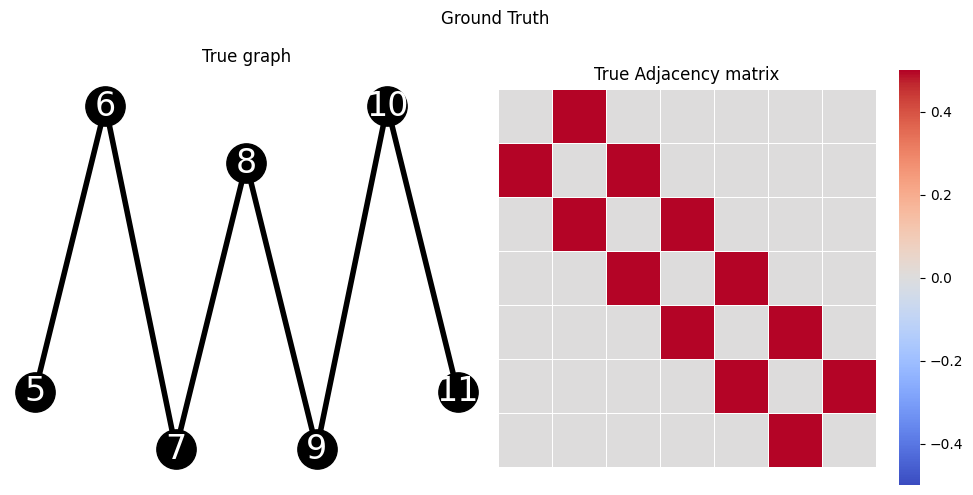

In [24]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    arcs=novice_pmuds.undirected_arcs
)

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

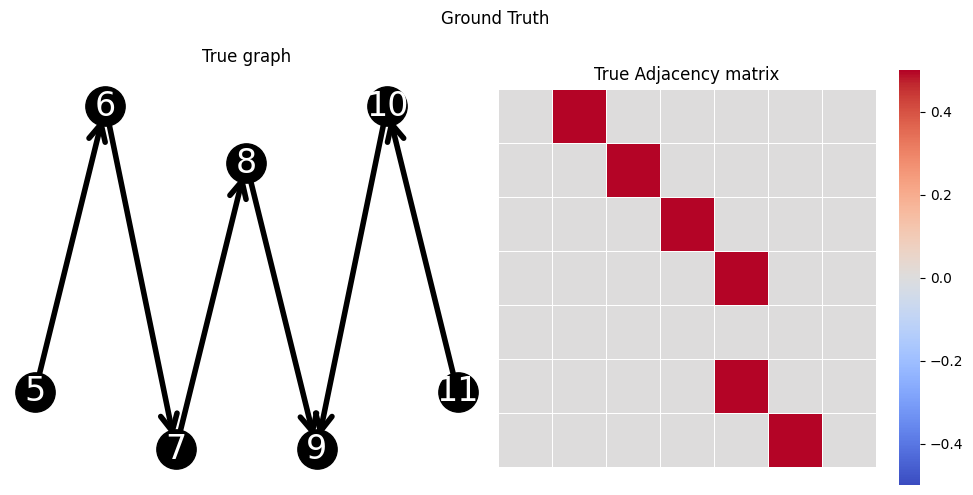

In [25]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    arcs=novice_pmuds.directed_arcs
)

In [26]:
novice_pmuds = NovicePMUDataRTDSV5(load=load_type)
novice_df = novice_pmuds.build_graph_data(n=30, norm_fn='pu')
novice_pmuds.graph_df

,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_0.8325,01_V_mag_0.8325,01_V_ang_0.8658,01_V_mag_0.8658,01_V_ang_0.8991,01_V_mag_0.8991,01_V_ang_0.9324,01_V_mag_0.9324,01_V_ang_0.9657,01_V_mag_0.9657
BUS5,0.881667,1.006510,0.881667,1.006508,0.881667,1.006509,0.881667,1.006509,0.881667,1.006509,...,0.881667,1.006509,0.881667,1.006509,0.881667,1.006510,0.881667,1.006509,0.881667,1.006509
BUS6,0.705696,0.978039,0.705695,0.978038,0.705696,0.978038,0.705695,0.978038,0.705696,0.978038,...,0.705696,0.978038,0.705696,0.978038,0.705696,0.978039,0.705696,0.978038,0.705696,0.978038
BUS7,0.558900,0.960965,0.558900,0.960964,0.558900,0.960965,0.558900,0.960964,0.558900,0.960965,...,0.558900,0.960965,0.558900,0.960964,0.558900,0.960965,0.558900,0.960964,0.558900,0.960965
BUS8,0.317674,0.948752,0.317674,0.948751,0.317674,0.948752,0.317674,0.948751,0.317674,0.948751,...,0.317674,0.948752,0.317674,0.948751,0.317674,0.948752,0.317674,0.948751,0.317674,0.948752
BUS9,0.081219,0.971338,0.081219,0.971337,0.081219,0.971338,0.081219,0.971337,0.081219,0.971338,...,0.081219,0.971338,0.081219,0.971337,0.081219,0.971338,0.081219,0.971337,0.081219,0.971338
BUS10,0.228098,0.983388,0.228097,0.983386,0.228098,0.983387,0.228097,0.983387,0.228098,0.983387,...,0.228098,0.983387,0.228098,0.983386,0.228098,0.983388,0.228098,0.983386,0.228098,0.983387
BUS11,0.407964,1.008326,0.407964,1.008325,0.407964,1.008325,0.407964,1.008325,0.407964,1.008325,...,0.407964,1.008326,0.407964,1.008325,0.407964,1.008326,0.407964,1.008325,0.407964,1.008325


### All Loads

In [27]:
novice_pmuds = NovicePMUDataRTDSV5(load=['high', 'medium', 'low'])
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 3604*3)

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[2 2 2 2 2 2 2]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS7_01_V_ang,BUS7_01_V_mag,BUS8_01_V_ang,BUS8_01_V_mag,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag
0,0.0000,0.881667,133655.0000,0.705696,129874.3125,0.558900,127607.1406,0.317674,125985.3359,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563
1,0.0333,0.881667,133654.8281,0.705695,129874.1641,0.558900,127606.9922,0.317674,125985.1797,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844
2,0.0666,0.881667,133654.9531,0.705696,129874.2734,0.558900,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094
3,0.0999,0.881667,133654.8594,0.705695,129874.1719,0.558900,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156
4,0.1332,0.881667,133654.8906,0.705696,129874.2188,0.558900,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,59.8401,0.834432,135723.2969,0.713432,133749.4688,0.604636,133303.2031,0.393484,132566.1094,0.186941,134854.3906,0.296159,134498.0313,0.433460,135904.2031
5402,59.8734,0.834432,135723.2969,0.713432,133749.4688,0.604636,133303.2031,0.393484,132566.1094,0.186941,134854.3906,0.296158,134498.0156,0.433460,135904.2031
5403,59.9067,0.834432,135723.2656,0.713432,133749.4375,0.604636,133303.1719,0.393484,132566.0781,0.186941,134854.3438,0.296158,134497.9844,0.433460,135904.1563
5404,59.9400,0.834432,135723.3594,0.713432,133749.5313,0.604636,133303.2656,0.393484,132566.1719,0.186941,134854.4531,0.296159,134498.0781,0.433460,135904.2656


,01_V_ang_0,01_V_mag_0,01_V_ang_1,01_V_mag_1,01_V_ang_2,01_V_mag_2,01_V_ang_3,01_V_mag_3,01_V_ang_4,01_V_mag_4,...,01_V_ang_5401,01_V_mag_5401,01_V_ang_5402,01_V_mag_5402,01_V_ang_5403,01_V_mag_5403,01_V_ang_5404,01_V_mag_5404,01_V_ang_5405,01_V_mag_5405
BUS5,0.881667,133655.0000,0.881667,133654.8281,0.881667,133654.9531,0.881667,133654.8594,0.881667,133654.8906,...,0.834432,135723.2969,0.834432,135723.2969,0.834432,135723.2656,0.834432,135723.3594,0.834432,135723.2344
BUS6,0.705696,129874.3125,0.705695,129874.1641,0.705696,129874.2734,0.705695,129874.1719,0.705696,129874.2188,...,0.713432,133749.4688,0.713432,133749.4688,0.713432,133749.4375,0.713432,133749.5313,0.713432,133749.4063
BUS7,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.604636,133303.2031,0.604636,133303.2031,0.604636,133303.1719,0.604636,133303.2656,0.604636,133303.1406
BUS8,0.317674,125985.3359,0.317674,125985.1797,0.317674,125985.2969,0.317674,125985.1953,0.317674,125985.2344,...,0.393484,132566.1094,0.393484,132566.1094,0.393484,132566.0781,0.393484,132566.1719,0.393484,132566.0469
BUS9,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.186941,134854.3906,0.186941,134854.3906,0.186941,134854.3438,0.186941,134854.4531,0.186941,134854.3281
BUS10,0.228098,130584.5859,0.228097,130584.4297,0.228098,130584.5547,0.228097,130584.4531,0.228098,130584.4922,...,0.296159,134498.0313,0.296158,134498.0156,0.296158,134497.9844,0.296159,134498.0781,0.296159,134497.9688
BUS11,0.407964,133896.1563,0.407964,133895.9844,0.407964,133896.1094,0.407964,133896.0156,0.407964,133896.0469,...,0.433460,135904.2031,0.433460,135904.2031,0.433460,135904.1563,0.433460,135904.2656,0.433460,135904.1406


### Load Type

In [28]:
novice_pmuds = NovicePMUDataRTDSV5(load='high', drop_current=False)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 10812)

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[4 6 6 6 6 6 4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.228097,130584.4297,0.171335,3594.701172,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704346,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.228097,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.228098,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704590,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,02_I_ang_0.0333,02_I_mag_0.0333,...,02_I_ang_59.94,02_I_mag_59.94,03_I_ang_59.94,03_I_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733
BUS5,0.881667,133655.0000,0.736893,1764.471191,0.000000,0.000000,0.881667,133654.8281,0.736893,1764.469116,...,0.736893,1764.470703,0.000000,0.000000,0.881667,133654.8281,0.736893,1764.469116,0.000000,0.000000
BUS6,0.705696,129874.3125,3.872345,1765.115723,0.613379,3576.634766,0.705695,129874.1641,3.872345,1765.113647,...,3.872345,1765.115234,0.613379,3576.633789,0.705695,129874.1563,3.872345,1765.113647,0.613379,3576.630371
BUS7,0.558900,127607.1406,3.753784,3576.714111,0.529491,523.139832,0.558900,127606.9922,3.753784,3576.709717,...,3.753784,3576.713135,0.529491,523.139709,0.558900,127606.9922,3.753784,3576.709717,0.529491,523.139221
BUS8,0.317674,125985.3359,3.583261,520.976074,0.441673,520.956970,0.317674,125985.1797,3.583260,520.975464,...,3.583261,520.975952,0.441672,520.956787,0.317674,125985.1797,3.583260,520.975464,0.441672,520.956299
BUS9,0.081219,128984.5703,3.495655,511.760620,3.311736,3594.632080,0.081219,128984.4219,3.495655,511.760010,...,3.495655,511.760468,3.311736,3594.631104,0.081219,128984.4219,3.495655,511.760010,3.311736,3594.627930
BUS10,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.228097,130584.4297,0.171335,3594.701172,...,0.171335,3594.704590,3.420001,1804.128906,0.228097,130584.4375,0.171335,3594.701172,3.420001,1804.127197
BUS11,0.407964,133896.1563,0.284443,1803.737061,0.000000,0.000000,0.407964,133895.9844,0.284443,1803.734985,...,0.284443,1803.736572,0.000000,0.000000,0.407964,133895.9844,0.284443,1803.734985,0.000000,0.000000


#### Drop Magnitude 

In [29]:
novice_pmuds = NovicePMUDataRTDSV5(load='high', drop_magnitude=True, drop_current=False)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 10812/2)
assert novice_pmuds.remaining_pmu_features == 1

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[4 6 6 6 6 6 4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.228097,130584.4297,0.171335,3594.701172,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704346,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.228097,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.228098,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704590,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572


,01_V_ang_0.0,02_I_ang_0.0,03_I_ang_0.0,01_V_ang_0.0333,02_I_ang_0.0333,03_I_ang_0.0333,01_V_ang_0.0666,02_I_ang_0.0666,03_I_ang_0.0666,01_V_ang_0.0999,...,03_I_ang_59.8734,01_V_ang_59.9067,02_I_ang_59.9067,03_I_ang_59.9067,01_V_ang_59.94,02_I_ang_59.94,03_I_ang_59.94,01_V_ang_59.9733,02_I_ang_59.9733,03_I_ang_59.9733
BUS5,0.881667,0.736893,0.000000,0.881667,0.736893,0.000000,0.881667,0.736893,0.000000,0.881667,...,0.000000,0.881667,0.736893,0.000000,0.881667,0.736893,0.000000,0.881667,0.736893,0.000000
BUS6,0.705696,3.872345,0.613379,0.705695,3.872345,0.613379,0.705696,3.872345,0.613379,0.705695,...,0.613379,0.705695,3.872345,0.613379,0.705696,3.872345,0.613379,0.705695,3.872345,0.613379
BUS7,0.558900,3.753784,0.529491,0.558900,3.753784,0.529491,0.558900,3.753784,0.529491,0.558900,...,0.529492,0.558900,3.753784,0.529491,0.558900,3.753784,0.529491,0.558900,3.753784,0.529491
BUS8,0.317674,3.583261,0.441673,0.317674,3.583260,0.441672,0.317674,3.583261,0.441672,0.317674,...,0.441673,0.317674,3.583260,0.441672,0.317674,3.583261,0.441672,0.317674,3.583260,0.441672
BUS9,0.081219,3.495655,3.311736,0.081219,3.495655,3.311736,0.081219,3.495655,3.311736,0.081219,...,3.311736,0.081219,3.495655,3.311736,0.081219,3.495655,3.311736,0.081219,3.495655,3.311736
BUS10,0.228098,0.171335,3.420001,0.228097,0.171335,3.420001,0.228098,0.171335,3.420001,0.228097,...,3.420001,0.228098,0.171335,3.420001,0.228098,0.171335,3.420001,0.228097,0.171335,3.420001
BUS11,0.407964,0.284443,0.000000,0.407964,0.284443,0.000000,0.407964,0.284443,0.000000,0.407964,...,0.000000,0.407964,0.284443,0.000000,0.407964,0.284443,0.000000,0.407964,0.284443,0.000000


#### Drop Angle

In [30]:
novice_pmuds = NovicePMUDataRTDSV5(load='high', drop_angle=True, drop_current=False)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 10812/2)
assert novice_pmuds.remaining_pmu_features == 1

nodes: 7
edges: 6
PMUs: 12
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[4 6 6 6 6 6 4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,0.881667,133655.0000,0.736893,1764.471191,0.705696,129874.3125,3.872345,1765.115723,0.613379,...,0.228098,130584.5859,0.171335,3594.705322,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061
1,0.0333,0.881667,133654.8281,0.736893,1764.469116,0.705695,129874.1641,3.872345,1765.113647,0.613379,...,0.228097,130584.4297,0.171335,3594.701172,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985
2,0.0666,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704346,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572
3,0.0999,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1719,3.872345,1765.113892,0.613379,...,0.228097,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229
4,0.1332,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.736893,1764.469971,0.705695,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1798,59.8734,0.881667,133654.8906,0.736893,1764.469971,0.705696,129874.2188,3.872345,1765.114502,0.613379,...,0.228098,130584.4922,0.171335,3594.702881,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718
1799,59.9067,0.881667,133654.8594,0.736893,1764.469360,0.705695,129874.1797,3.872345,1765.113892,0.613379,...,0.228098,130584.4531,0.171335,3594.701660,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229
1800,59.9400,0.881667,133654.9531,0.736893,1764.470703,0.705696,129874.2734,3.872345,1765.115234,0.613379,...,0.228098,130584.5547,0.171335,3594.704590,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572


,01_V_mag_0.0,02_I_mag_0.0,03_I_mag_0.0,01_V_mag_0.0333,02_I_mag_0.0333,03_I_mag_0.0333,01_V_mag_0.0666,02_I_mag_0.0666,03_I_mag_0.0666,01_V_mag_0.0999,...,03_I_mag_59.8734,01_V_mag_59.9067,02_I_mag_59.9067,03_I_mag_59.9067,01_V_mag_59.94,02_I_mag_59.94,03_I_mag_59.94,01_V_mag_59.9733,02_I_mag_59.9733,03_I_mag_59.9733
BUS5,133655.0000,1764.471191,0.000000,133654.8281,1764.469116,0.000000,133654.9531,1764.470703,0.000000,133654.8594,...,0.000000,133654.8594,1764.469360,0.000000,133654.9531,1764.470703,0.000000,133654.8281,1764.469116,0.000000
BUS6,129874.3125,1765.115723,3576.634766,129874.1641,1765.113647,3576.630371,129874.2734,1765.115234,3576.633789,129874.1719,...,3576.632080,129874.1797,1765.113892,3576.630859,129874.2734,1765.115234,3576.633789,129874.1563,1765.113647,3576.630371
BUS7,127607.1406,3576.714111,523.139832,127606.9922,3576.709717,523.139221,127607.1094,3576.713135,523.139709,127607.0078,...,523.139465,127607.0078,3576.710205,523.139282,127607.1094,3576.713135,523.139709,127606.9922,3576.709717,523.139221
BUS8,125985.3359,520.976074,520.956970,125985.1797,520.975464,520.956299,125985.2969,520.975952,520.956787,125985.1953,...,520.956543,125985.1953,520.975525,520.956360,125985.2969,520.975952,520.956787,125985.1797,520.975464,520.956299
BUS9,128984.5703,511.760620,3594.632080,128984.4219,511.760010,3594.627930,128984.5391,511.760498,3594.631104,128984.4375,...,3594.629639,128984.4375,511.760071,3594.628418,128984.5391,511.760468,3594.631104,128984.4219,511.760010,3594.627930
BUS10,130584.5859,3594.705322,1804.129395,130584.4297,3594.701172,1804.127197,130584.5547,3594.704346,1804.128906,130584.4531,...,1804.128052,130584.4531,3594.701660,1804.127441,130584.5547,3594.704590,1804.128906,130584.4375,3594.701172,1804.127197
BUS11,133896.1563,1803.737061,0.000000,133895.9844,1803.734985,0.000000,133896.1094,1803.736572,0.000000,133896.0156,...,0.000000,133896.0000,1803.735229,0.000000,133896.1094,1803.736572,0.000000,133895.9844,1803.734985,0.000000


### Topology Partial Left

In [31]:
novice_pmuds = NovicePMUDataRTDSV5(
    load=load_type, 
    topology='partial-left',
    drop_current=False,
    drop_parallel_currents=False,
)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 18020)

nodes: 7
edges: 8
PMUs: 16
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[ 4  6  8 10  8  6  4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,1.222997,132636.9063,1.024219,1806.648438,1.042278,127544.4063,-2.123265,1807.839722,0.865537,...,0.222247,128587.3672,0.092176,3698.574951,3.372912,1840.554932,0.406406,133020.1250,0.237153,1839.694946
1,0.0333,1.222996,132636.8750,1.024218,1806.647583,1.042278,127544.3672,-2.123265,1807.838745,0.865537,...,0.222247,128587.3281,0.092176,3698.574219,3.372912,1840.554688,0.406406,133020.0781,0.237154,1839.694702
2,0.0666,1.222996,132636.9688,1.024218,1806.648682,1.042277,127544.4766,-2.123266,1807.839844,0.865536,...,0.222247,128587.4297,0.092176,3698.577637,3.372912,1840.556396,0.406406,133020.1719,0.237154,1839.696411
3,0.0999,1.222995,132636.8594,1.024217,1806.646729,1.042277,127544.3594,-2.123266,1807.837891,0.865536,...,0.222247,128587.3125,0.092176,3698.574707,3.372912,1840.555054,0.406406,133020.0625,0.237154,1839.694946
4,0.1332,1.222995,132636.9844,1.024217,1806.648560,1.042276,127544.5234,-2.123267,1807.839722,0.865536,...,0.222247,128587.4688,0.092176,3698.579590,3.372912,1840.557495,0.406406,133020.2188,0.237154,1839.697388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,1.222996,132636.7969,1.024218,1806.647461,1.042278,127544.3047,-2.123266,1807.838623,0.865537,...,0.222247,128587.2891,0.092176,3698.573242,3.372912,1840.554077,0.406407,133020.0313,0.237153,1839.694092
1798,59.8734,1.222996,132636.7969,1.024218,1806.647461,1.042278,127544.3047,-2.123266,1807.838623,0.865537,...,0.222247,128587.2891,0.092176,3698.573242,3.372912,1840.554077,0.406407,133020.0313,0.237153,1839.694092
1799,59.9067,1.222996,132636.9063,1.024218,1806.649048,1.042278,127544.4297,-2.123266,1807.840332,0.865537,...,0.222247,128587.4063,0.092176,3698.576660,3.372912,1840.555786,0.406406,133020.1719,0.237153,1839.695801
1800,59.9400,1.222996,132636.8125,1.024218,1806.647705,1.042278,127544.3359,-2.123266,1807.838867,0.865537,...,0.222247,128587.3047,0.092176,3698.573975,3.372912,1840.554443,0.406407,133020.0625,0.237153,1839.694458


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS5,1.222997,132636.9063,1.024219,1806.648438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.222996,132636.8594,1.024218,1806.648193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS6,1.042278,127544.4063,-2.123265,1807.839722,0.865537,3706.857422,0.000000,0.000000,0.000000,0.000000,...,1.042278,127544.3672,-2.123266,1807.839355,0.865537,3706.857178,0.000000,0.000000,0.000000,0.000000
BUS7,0.888346,123617.5547,-2.277167,3707.271240,0.888414,0.001236,0.633520,1135.566895,0.000000,0.000000,...,0.888346,123617.5234,-2.277167,3707.270996,0.888390,0.001236,0.633520,1135.565918,0.000000,0.000000
BUS8,0.331052,117065.1953,0.331110,0.001171,-2.545206,1135.647949,0.596386,567.825989,0.596386,567.826111,...,0.331052,117065.1953,0.331109,0.001171,-2.545206,1135.647095,0.596385,567.825562,0.596385,567.825623
BUS9,0.069213,125566.4063,-2.618344,552.172852,-2.618344,552.172913,3.232637,3698.799072,0.000000,0.000000,...,0.069213,125566.3984,-2.618345,552.172363,-2.618345,552.172485,3.232637,3698.799316,0.000000,0.000000
BUS10,0.222247,128587.3672,0.092176,3698.574951,3.372912,1840.554932,0.000000,0.000000,0.000000,0.000000,...,0.222247,128587.3438,0.092176,3698.574951,3.372912,1840.555054,0.000000,0.000000,0.000000,0.000000
BUS11,0.406406,133020.1250,0.237153,1839.694946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.406406,133020.0938,0.237153,1839.694946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
pruned_cols = novice_pmuds.filter(novice_pmuds.df, ['BUS7_04', 'BUS8_02'])
novice_pmuds.df[pruned_cols]

,BUS7_04_I_ang,BUS7_04_I_mag,BUS8_02_I_ang,BUS8_02_I_mag
0,0.888414,0.001236,0.331110,0.001171
1,0.888398,0.001236,0.331081,0.001171
2,0.888408,0.001236,0.331106,0.001171
3,0.888402,0.001236,0.331111,0.001171
4,0.888347,0.001236,0.331109,0.001171
...,...,...,...,...
1797,0.888401,0.001236,0.331104,0.001171
1798,0.888401,0.001236,0.331104,0.001171
1799,0.888397,0.001236,0.331107,0.001171
1800,0.888401,0.001236,0.331104,0.001171


(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

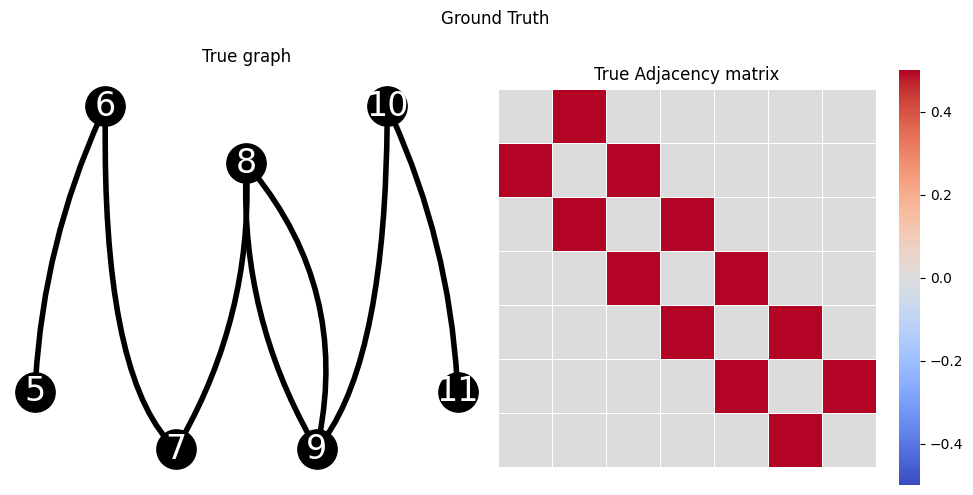

In [33]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    arcs=novice_pmuds.undirected_arcs
)

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

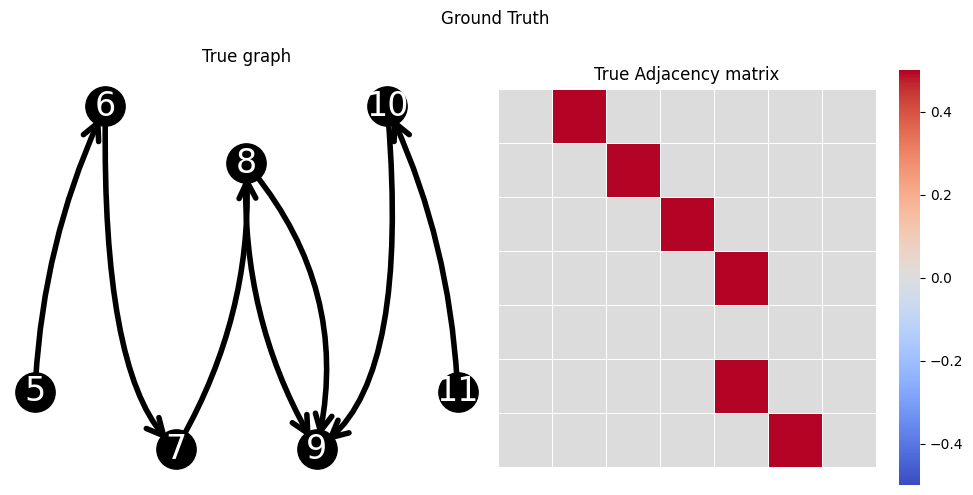

In [34]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    arcs=novice_pmuds.directed_arcs
)

### Topology Partial Right

In [35]:
novice_pmuds = NovicePMUDataRTDSV5(
    load=load_type, 
    topology='partial-right',
    drop_current=False,
    drop_parallel_currents=False,
)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (7, 18020)

nodes: 7
edges: 8
PMUs: 16
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11']
[ 4  6  8 10  8  6  4]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS5_03_I_ang,BUS5_03_I_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS6_03_I_ang,BUS6_03_I_mag,BUS6_04_I_ang,...,BUS10_01_V_ang,BUS10_01_V_mag,BUS10_02_I_ang,BUS10_02_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag
0,0.0000,1.219676,132769.2813,1.028079,1802.243652,1.039442,127852.3438,-2.119434,1803.362305,0.873834,...,0.221598,128262.7813,0.079664,3713.739502,-2.917853,1844.947510,0.406274,132880.4219,0.229547,1844.011108
1,0.0333,1.219680,132769.3750,1.028082,1802.245728,1.039446,127852.4141,-2.119431,1803.364502,0.873836,...,0.221598,128262.8594,0.079664,3713.741211,-2.917853,1844.948242,0.406274,132880.5156,0.229546,1844.011841
2,0.0666,1.219684,132769.2188,1.028085,1802.244873,1.039450,127852.2578,-2.119428,1803.363525,0.873839,...,0.221599,128262.7188,0.079663,3713.736572,-2.917854,1844.945801,0.406274,132880.4063,0.229545,1844.009277
3,0.0999,1.219688,132769.3594,1.028088,1802.247803,1.039454,127852.3672,-2.119425,1803.366455,0.873842,...,0.221599,128262.8438,0.079662,3713.739990,-2.917855,1844.947266,0.406274,132880.5469,0.229545,1844.010864
4,0.1332,1.219692,132769.1719,1.028091,1802.246460,1.039458,127852.1797,-2.119422,1803.365112,0.873845,...,0.221599,128262.6563,0.079660,3713.734863,-2.917855,1844.944336,0.406275,132880.3594,0.229544,1844.007935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,1.219659,132769.3594,1.028066,1802.242188,1.039426,127852.5234,-2.119447,1803.360840,0.873822,...,0.221598,128262.9844,0.079670,3713.738281,-2.917848,1844.948364,0.406274,132880.5313,0.229551,1844.011963
1798,59.8734,1.219661,132769.4688,1.028068,1802.244019,1.039428,127852.6250,-2.119445,1803.362549,0.873823,...,0.221598,128263.0859,0.079669,3713.741699,-2.917849,1844.949951,0.406274,132880.6406,0.229550,1844.013550
1799,59.9067,1.219663,132769.3438,1.028069,1802.242920,1.039430,127852.5156,-2.119444,1803.361450,0.873825,...,0.221598,128262.9766,0.079669,3713.738525,-2.917849,1844.948242,0.406274,132880.5469,0.229550,1844.011841
1800,59.9400,1.219665,132769.3906,1.028071,1802.243774,1.039432,127852.5234,-2.119442,1803.362427,0.873826,...,0.221598,128263.0000,0.079668,3713.738770,-2.917850,1844.948364,0.406274,132880.5781,0.229550,1844.011963


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,05_I_ang_0.0,05_I_mag_0.0,...,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733,05_I_ang_59.9733,05_I_mag_59.9733
BUS5,1.219676,132769.2813,1.028079,1802.243652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.219668,132769.3750,1.028073,1802.244019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BUS6,1.039442,127852.3438,-2.119434,1803.362305,0.873834,3690.906250,0.000000,0.000000,0.000000,0.000000,...,1.039435,127852.5000,-2.119440,1803.362549,0.873828,3690.903564,0.000000,0.000000,0.000000,0.000000
BUS7,0.886363,124149.1328,-2.268880,3691.276611,0.660879,561.619080,0.660879,561.619202,0.000000,0.000000,...,0.886356,124149.3281,-2.268886,3691.274170,0.660876,561.615112,0.660876,561.615173,0.000000,0.000000
BUS8,0.618264,116551.3047,-2.557049,567.398132,-2.557049,567.398193,0.618336,0.001166,0.584543,1134.772217,...,0.618259,116551.6719,-2.557053,567.393982,-2.557053,567.394043,0.618305,0.001166,0.584539,1134.763794
BUS9,0.067680,125006.1563,0.067755,0.001250,-2.593524,1124.955322,-3.063050,3714.010986,0.000000,0.000000,...,0.067681,125006.3828,0.067730,0.001250,-2.593527,1124.947021,-3.063047,3714.009766,0.000000,0.000000
BUS10,0.221598,128262.7813,0.079664,3713.739502,-2.917853,1844.947510,0.000000,0.000000,0.000000,0.000000,...,0.221598,128262.9609,0.079667,3713.738281,-2.917850,1844.947876,0.000000,0.000000,0.000000,0.000000
BUS11,0.406274,132880.4219,0.229547,1844.011108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.406274,132880.5469,0.229549,1844.011475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

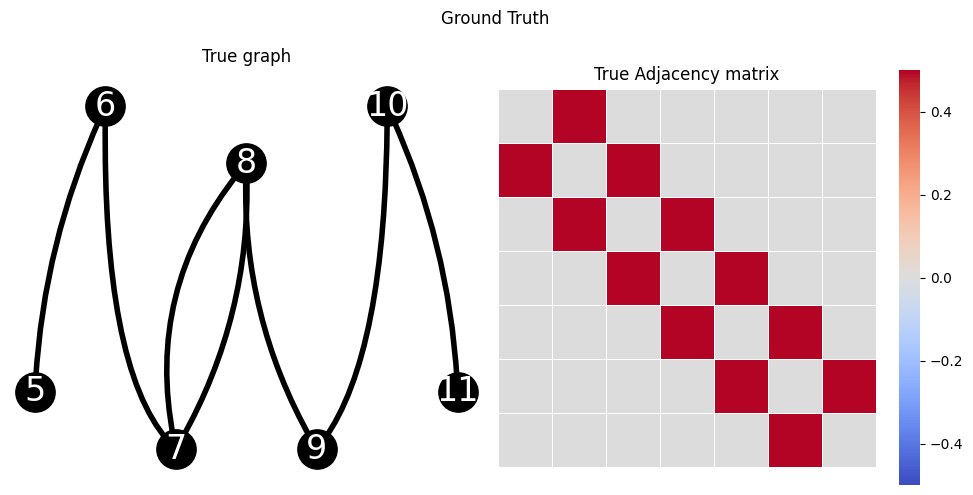

In [36]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    arcs=novice_pmuds.undirected_arcs
)

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

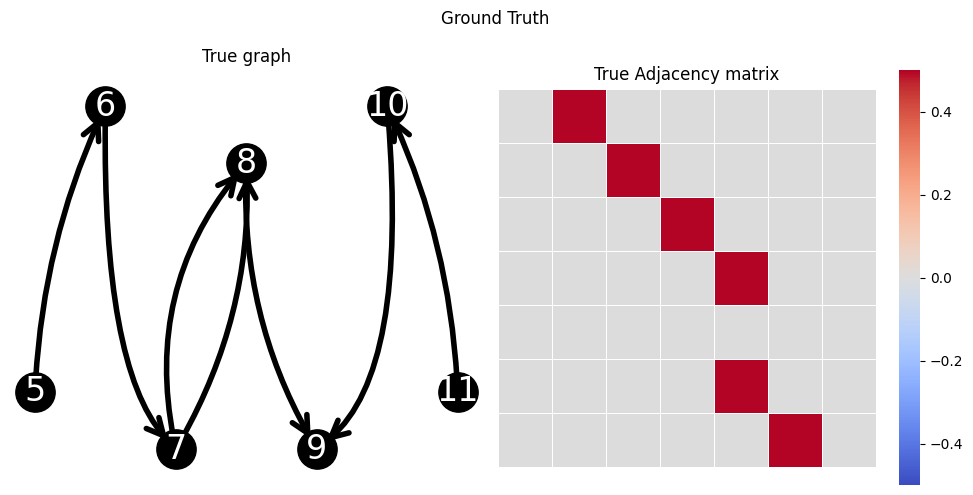

In [37]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    arcs=novice_pmuds.directed_arcs
)

# Intermediate 

In [38]:
novice_pmuds = IntermediatePMUDataRTDSV5(load=load_type)
novice_pmuds.load_data() # Has built in checks
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)
assert novice_pmuds.graph_df.shape == (13, 3604)

nodes: 13
edges: 12
PMUs: 24
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13']
[2 2 2 2 2 2 2 2 2 2 2 2 2]


,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS3_01_V_ang,BUS3_01_V_mag,BUS4_01_V_ang,BUS4_01_V_mag,BUS5_01_V_ang,...,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.0000,0.470849,11902.43848,0.300488,11671.10645,0,11902.49121,-0.177758,11671.20117,0.881667,...,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563,0.5589,127607.1406,0.081219,128984.5703
1,0.0333,0.470849,11902.42188,0.300488,11671.09375,0,11902.47754,-0.177758,11671.18750,0.881667,...,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844,0.5589,127606.9922,0.081219,128984.4219
2,0.0666,0.470849,11902.43262,0.300488,11671.10352,0,11902.48926,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391
3,0.0999,0.470849,11902.42480,0.300488,11671.09473,0,11902.47852,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156,0.5589,127607.0078,0.081219,128984.4375
4,0.1332,0.470849,11902.42871,0.300488,11671.09766,0,11902.48340,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1798,59.8734,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1799,59.9067,0.470849,11902.42383,0.300488,11671.09570,0,11902.47949,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000,0.5589,127607.0078,0.081219,128984.4375
1800,59.9400,0.470849,11902.43359,0.300488,11671.10449,0,11902.48828,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS1,0.470849,11902.43848,0.470849,11902.42188,0.470849,11902.43262,0.470849,11902.42480,0.470849,11902.42871,...,0.470849,11902.42773,0.470849,11902.42773,0.470849,11902.42383,0.470849,11902.43359,0.470849,11902.42285
BUS2,0.300488,11671.10645,0.300488,11671.09375,0.300488,11671.10352,0.300488,11671.09473,0.300488,11671.09766,...,0.300488,11671.09766,0.300488,11671.09766,0.300488,11671.09570,0.300488,11671.10449,0.300488,11671.09277
BUS3,0.000000,11902.49121,0.000000,11902.47754,0.000000,11902.48926,0.000000,11902.47852,0.000000,11902.48340,...,0.000000,11902.48242,0.000000,11902.48242,0.000000,11902.47949,0.000000,11902.48828,0.000000,11902.47754
BUS4,-0.177758,11671.20117,-0.177758,11671.18750,-0.177758,11671.19727,-0.177758,11671.18848,-0.177758,11671.19238,...,-0.177758,11671.19238,-0.177758,11671.19238,-0.177758,11671.18848,-0.177758,11671.19727,-0.177758,11671.18652
BUS5,0.881667,133655.00000,0.881667,133654.82810,0.881667,133654.95310,0.881667,133654.85940,0.881667,133654.89060,...,0.881667,133654.89060,0.881667,133654.89060,0.881667,133654.85940,0.881667,133654.95310,0.881667,133654.82810
BUS6,0.705696,129874.31250,0.705695,129874.16410,0.705696,129874.27340,0.705695,129874.17190,0.705696,129874.21880,...,0.705695,129874.21880,0.705696,129874.21880,0.705695,129874.17970,0.705696,129874.27340,0.705695,129874.15630
BUS7,0.558900,127607.14060,0.558900,127606.99220,0.558900,127607.10940,0.558900,127607.00780,0.558900,127607.04690,...,0.558900,127607.04690,0.558900,127607.04690,0.558900,127607.00780,0.558900,127607.10940,0.558900,127606.99220
BUS8,0.317674,125985.33590,0.317674,125985.17970,0.317674,125985.29690,0.317674,125985.19530,0.317674,125985.23440,...,0.317674,125985.23440,0.317674,125985.23440,0.317674,125985.19530,0.317674,125985.29690,0.317674,125985.17970
BUS9,0.081219,128984.57030,0.081219,128984.42190,0.081219,128984.53910,0.081219,128984.43750,0.081219,128984.47660,...,0.081219,128984.47660,0.081219,128984.47660,0.081219,128984.43750,0.081219,128984.53910,0.081219,128984.42190
BUS10,0.228098,130584.58590,0.228097,130584.42970,0.228098,130584.55470,0.228097,130584.45310,0.228098,130584.49220,...,0.228098,130584.49220,0.228098,130584.49220,0.228098,130584.45310,0.228098,130584.55470,0.228097,130584.43750


In [39]:
novice_pmuds.df.iloc[:, 1:9]

,BUS1_01_V_ang,BUS1_01_V_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS3_01_V_ang,BUS3_01_V_mag,BUS4_01_V_ang,BUS4_01_V_mag
0,0.470849,11902.43848,0.300488,11671.10645,0,11902.49121,-0.177758,11671.20117
1,0.470849,11902.42188,0.300488,11671.09375,0,11902.47754,-0.177758,11671.18750
2,0.470849,11902.43262,0.300488,11671.10352,0,11902.48926,-0.177758,11671.19727
3,0.470849,11902.42480,0.300488,11671.09473,0,11902.47852,-0.177758,11671.18848
4,0.470849,11902.42871,0.300488,11671.09766,0,11902.48340,-0.177758,11671.19238
...,...,...,...,...,...,...,...,...
1797,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238
1798,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238
1799,0.470849,11902.42383,0.300488,11671.09570,0,11902.47949,-0.177758,11671.18848
1800,0.470849,11902.43359,0.300488,11671.10449,0,11902.48828,-0.177758,11671.19727


In [40]:
novice_pmuds.df.iloc[:, -4:]

,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.5589,127607.1406,0.081219,128984.5703
1,0.5589,127606.9922,0.081219,128984.4219
2,0.5589,127607.1094,0.081219,128984.5391
3,0.5589,127607.0078,0.081219,128984.4375
4,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...
1797,0.5589,127607.0469,0.081219,128984.4766
1798,0.5589,127607.0469,0.081219,128984.4766
1799,0.5589,127607.0078,0.081219,128984.4375
1800,0.5589,127607.1094,0.081219,128984.5391


(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

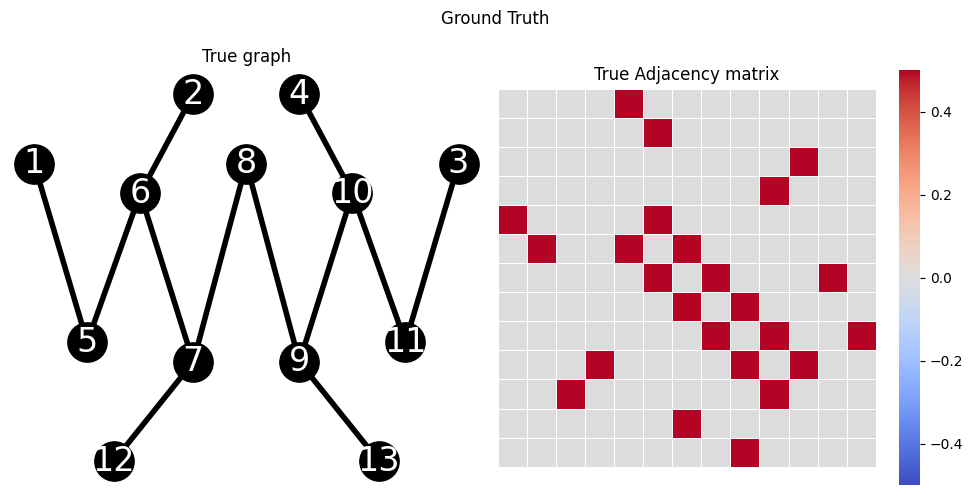

In [41]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    # save_path='intermediate_network_graph.pdf',
)

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

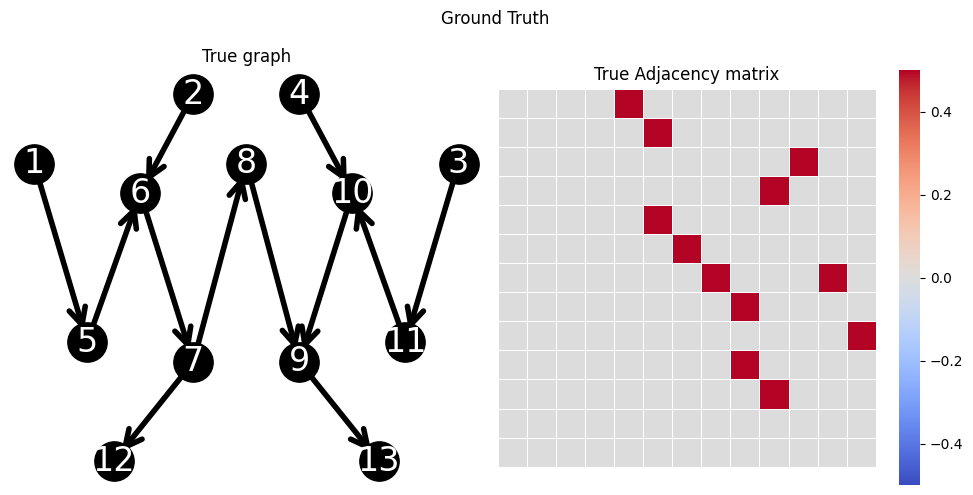

In [42]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='intermediate_flow_graph.pdf',
)

## No Dist

In [43]:
from gc4eptn.dataloaders import IntermediateNoDistPMUDataRTDSV5

inter_pmuds = IntermediateNoDistPMUDataRTDSV5(load=load_type, drop_current=False)
inter_pmuds.load_data() # Has built in checks
print_pmuds_vars(inter_pmuds)
display(inter_pmuds.df)

inter_pmuds.build_graph_data(norm_fn='pu')
display(inter_pmuds.graph_df)
assert inter_pmuds.graph_df.shape == (11, 14416) or inter_pmuds.graph_df.shape == (11, 3604)

nodes: 11
edges: 10
PMUs: 20
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11']
[4 4 4 4 6 8 6 6 6 8 6]


,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS1_02_I_ang,BUS1_02_I_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS2_02_I_ang,BUS2_02_I_mag,BUS3_01_V_ang,...,BUS10_03_I_ang,BUS10_03_I_mag,BUS10_04_I_ang,BUS10_04_I_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS11_02_I_ang,BUS11_02_I_mag,BUS11_03_I_ang,BUS11_03_I_mag
0,0.0000,0.470849,11902.43848,0.241548,20307.91992,0.300488,11671.10645,0.00517,21123.56055,0,...,0.064682,1811.224121,3.420001,1804.129395,0.407964,133896.1563,0.284443,1803.737061,0.284445,1803.762207
1,0.0333,0.470849,11902.42188,0.241548,20307.89648,0.300488,11671.09375,0.00517,21123.53516,0,...,0.064682,1811.221924,3.420001,1804.127197,0.407964,133895.9844,0.284443,1803.734985,0.284445,1803.760010
2,0.0666,0.470849,11902.43262,0.241548,20307.91602,0.300488,11671.10352,0.00517,21123.55469,0,...,0.064682,1811.223633,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719
3,0.0999,0.470849,11902.42480,0.241548,20307.90039,0.300488,11671.09473,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0156,0.284443,1803.735229,0.284445,1803.760376
4,0.1332,0.470849,11902.42871,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54492,0,...,0.064682,1811.222778,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735840,0.284445,1803.760864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1798,59.8734,0.470849,11902.42773,0.241548,20307.90625,0.300488,11671.09766,0.00517,21123.54297,0,...,0.064682,1811.222900,3.420001,1804.128052,0.407964,133896.0469,0.284443,1803.735718,0.284445,1803.760864
1799,59.9067,0.470849,11902.42383,0.241548,20307.89844,0.300488,11671.09570,0.00517,21123.53711,0,...,0.064682,1811.222290,3.420001,1804.127441,0.407964,133896.0000,0.284443,1803.735229,0.284445,1803.760376
1800,59.9400,0.470849,11902.43359,0.241548,20307.91406,0.300488,11671.10449,0.00517,21123.55273,0,...,0.064682,1811.223755,3.420001,1804.128906,0.407964,133896.1094,0.284443,1803.736572,0.284445,1803.761719


,01_V_ang_0.0,01_V_mag_0.0,02_I_ang_0.0,02_I_mag_0.0,03_I_ang_0.0,03_I_mag_0.0,04_I_ang_0.0,04_I_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,...,04_I_ang_59.94,04_I_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733,02_I_ang_59.9733,02_I_mag_59.9733,03_I_ang_59.9733,03_I_mag_59.9733,04_I_ang_59.9733,04_I_mag_59.9733
BUS1,0.470849,1.030781,0.241548,2.344957,0.000000,0.000000,0.000000,0.000000,0.470849,1.030780,...,0.000000,0.000000,0.470849,1.030780,0.241548,2.344954,0.000000,0.000000,0.000000,0.000000
BUS2,0.300488,1.010747,0.005170,2.439139,0.000000,0.000000,0.000000,0.000000,0.300488,1.010746,...,0.000000,0.000000,0.300488,1.010746,0.005170,2.439136,0.000000,0.000000,0.000000,0.000000
BUS3,0.000000,1.030786,-0.210902,2.397140,0.000000,0.000000,0.000000,0.000000,0.000000,1.030785,...,0.000000,0.000000,0.000000,1.030785,-0.210903,2.397137,0.000000,0.000000,0.000000,0.000000
BUS4,-0.177758,1.010756,-0.430665,2.407056,0.000000,0.000000,0.000000,0.000000,-0.177758,1.010754,...,0.000000,0.000000,-0.177758,1.010754,-0.430665,2.407054,0.000000,0.000000,0.000000,0.000000
BUS5,0.881667,1.006510,0.736895,2.343084,0.736893,2.343051,0.000000,0.000000,0.881667,1.006508,...,0.000000,0.000000,0.881667,1.006508,0.736895,2.343082,0.736893,2.343048,0.000000,0.000000
BUS6,0.705696,0.978039,0.500518,2.437191,3.872345,2.343907,0.613379,4.749433,0.705695,0.978038,...,0.613379,4.749432,0.705695,0.978038,0.500518,2.437188,3.872345,2.343904,0.613379,4.749428
BUS7,0.558900,0.960965,3.753784,4.749539,0.529491,0.694680,0.000000,0.000000,0.558900,0.960964,...,0.000000,0.000000,0.558900,0.960964,3.753784,4.749533,0.529491,0.694680,0.000000,0.000000
BUS8,0.317674,0.948752,3.583261,0.691807,0.441673,0.691782,0.000000,0.000000,0.317674,0.948751,...,0.000000,0.000000,0.317674,0.948751,3.583260,0.691806,0.441672,0.691781,0.000000,0.000000
BUS9,0.081219,0.971338,3.495655,0.679570,3.311736,4.773332,0.000000,0.000000,0.081219,0.971337,...,0.000000,0.000000,0.081219,0.971337,3.495655,0.679569,3.311736,4.773327,0.000000,0.000000
BUS10,0.228098,0.983388,0.171335,4.773429,0.064682,2.405135,3.420001,2.395714,0.228097,0.983386,...,3.420001,2.395713,0.228097,0.983386,0.171335,4.773424,0.064682,2.405132,3.420001,2.395711


(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

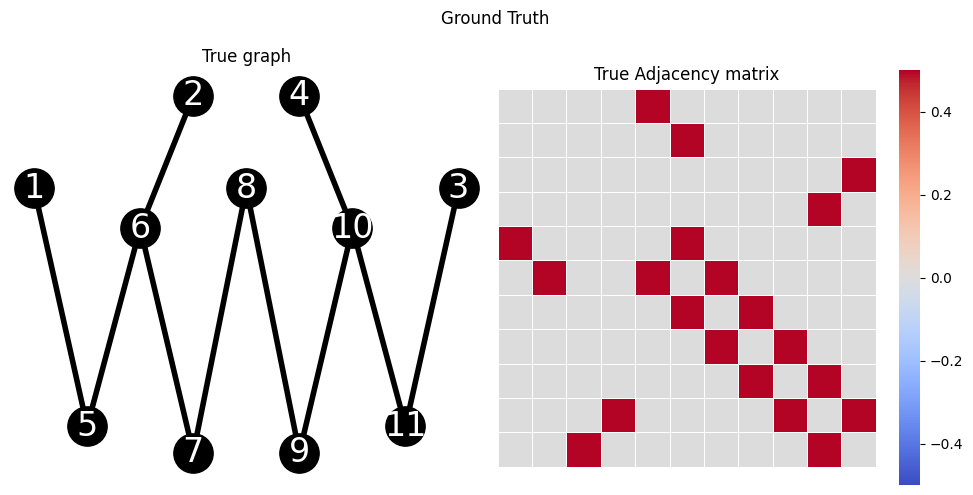

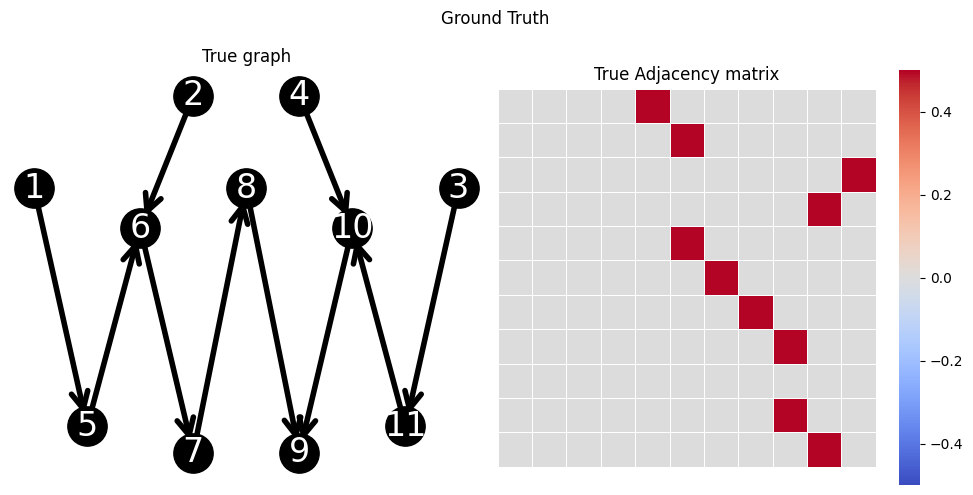

In [44]:
plot_ground_truth(
    A=inter_pmuds.true_network_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    # save_path='intermediate_network_graph.pdf',
)

plot_ground_truth(
    A=inter_pmuds.true_flow_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='intermediate_flow_graph.pdf',
)

## No Gen

In [45]:
from gc4eptn.dataloaders import IntermediateNoGenPMUDataRTDSV5

inter_pmuds = IntermediateNoGenPMUDataRTDSV5(load=load_type)
inter_pmuds.load_data() # Has built in checks
print_pmuds_vars(inter_pmuds)
display(inter_pmuds.df)

inter_pmuds.build_graph_data()
display(inter_pmuds.graph_df)
assert inter_pmuds.graph_df.shape == (9, 3604)

nodes: 9
edges: 8
PMUs: 16
features:
['BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10' 'BUS11' 'BUS12' 'BUS13']
[2 2 2 2 2 2 2 2 2]


,Time,BUS5_01_V_ang,BUS5_01_V_mag,BUS6_01_V_ang,BUS6_01_V_mag,BUS7_01_V_ang,BUS7_01_V_mag,BUS8_01_V_ang,BUS8_01_V_mag,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.0000,0.881667,133655.0000,0.705696,129874.3125,0.5589,127607.1406,0.317674,125985.3359,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563,0.5589,127607.1406,0.081219,128984.5703
1,0.0333,0.881667,133654.8281,0.705695,129874.1641,0.5589,127606.9922,0.317674,125985.1797,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844,0.5589,127606.9922,0.081219,128984.4219
2,0.0666,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391
3,0.0999,0.881667,133654.8594,0.705695,129874.1719,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156,0.5589,127607.0078,0.081219,128984.4375
4,0.1332,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.881667,133654.8906,0.705695,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1798,59.8734,0.881667,133654.8906,0.705696,129874.2188,0.5589,127607.0469,0.317674,125985.2344,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1799,59.9067,0.881667,133654.8594,0.705695,129874.1797,0.5589,127607.0078,0.317674,125985.1953,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000,0.5589,127607.0078,0.081219,128984.4375
1800,59.9400,0.881667,133654.9531,0.705696,129874.2734,0.5589,127607.1094,0.317674,125985.2969,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391


,01_V_ang_0.0,01_V_mag_0.0,01_V_ang_0.0333,01_V_mag_0.0333,01_V_ang_0.0666,01_V_mag_0.0666,01_V_ang_0.0999,01_V_mag_0.0999,01_V_ang_0.1332,01_V_mag_0.1332,...,01_V_ang_59.8401,01_V_mag_59.8401,01_V_ang_59.8734,01_V_mag_59.8734,01_V_ang_59.9067,01_V_mag_59.9067,01_V_ang_59.94,01_V_mag_59.94,01_V_ang_59.9733,01_V_mag_59.9733
BUS5,0.881667,133655.0000,0.881667,133654.8281,0.881667,133654.9531,0.881667,133654.8594,0.881667,133654.8906,...,0.881667,133654.8906,0.881667,133654.8906,0.881667,133654.8594,0.881667,133654.9531,0.881667,133654.8281
BUS6,0.705696,129874.3125,0.705695,129874.1641,0.705696,129874.2734,0.705695,129874.1719,0.705696,129874.2188,...,0.705695,129874.2188,0.705696,129874.2188,0.705695,129874.1797,0.705696,129874.2734,0.705695,129874.1563
BUS7,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS8,0.317674,125985.3359,0.317674,125985.1797,0.317674,125985.2969,0.317674,125985.1953,0.317674,125985.2344,...,0.317674,125985.2344,0.317674,125985.2344,0.317674,125985.1953,0.317674,125985.2969,0.317674,125985.1797
BUS9,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219
BUS10,0.228098,130584.5859,0.228097,130584.4297,0.228098,130584.5547,0.228097,130584.4531,0.228098,130584.4922,...,0.228098,130584.4922,0.228098,130584.4922,0.228098,130584.4531,0.228098,130584.5547,0.228097,130584.4375
BUS11,0.407964,133896.1563,0.407964,133895.9844,0.407964,133896.1094,0.407964,133896.0156,0.407964,133896.0469,...,0.407964,133896.0469,0.407964,133896.0469,0.407964,133896.0000,0.407964,133896.1094,0.407964,133895.9844
BUS12,0.558900,127607.1406,0.558900,127606.9922,0.558900,127607.1094,0.558900,127607.0078,0.558900,127607.0469,...,0.558900,127607.0469,0.558900,127607.0469,0.558900,127607.0078,0.558900,127607.1094,0.558900,127606.9922
BUS13,0.081219,128984.5703,0.081219,128984.4219,0.081219,128984.5391,0.081219,128984.4375,0.081219,128984.4766,...,0.081219,128984.4766,0.081219,128984.4766,0.081219,128984.4375,0.081219,128984.5391,0.081219,128984.4219


(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: title={'center': 'True graph'}>,
        <Axes: title={'center': 'True Adjacency matrix'}>], dtype=object))

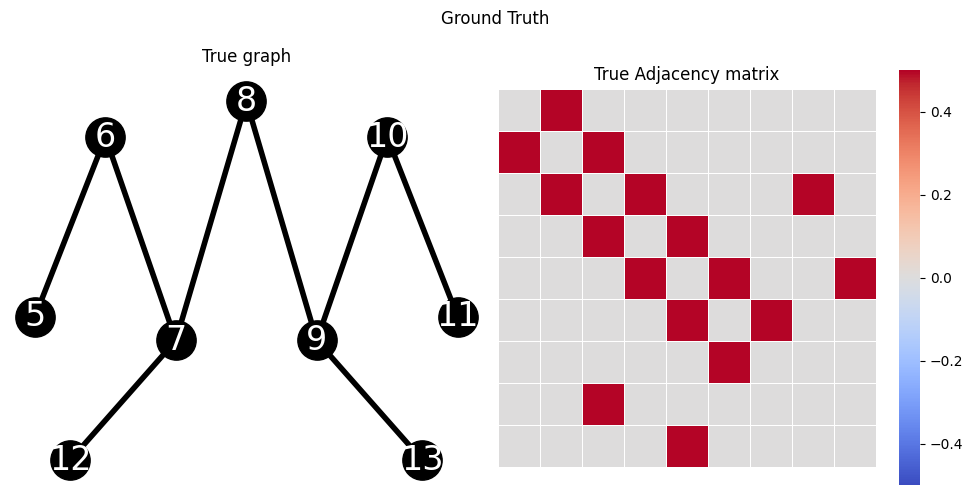

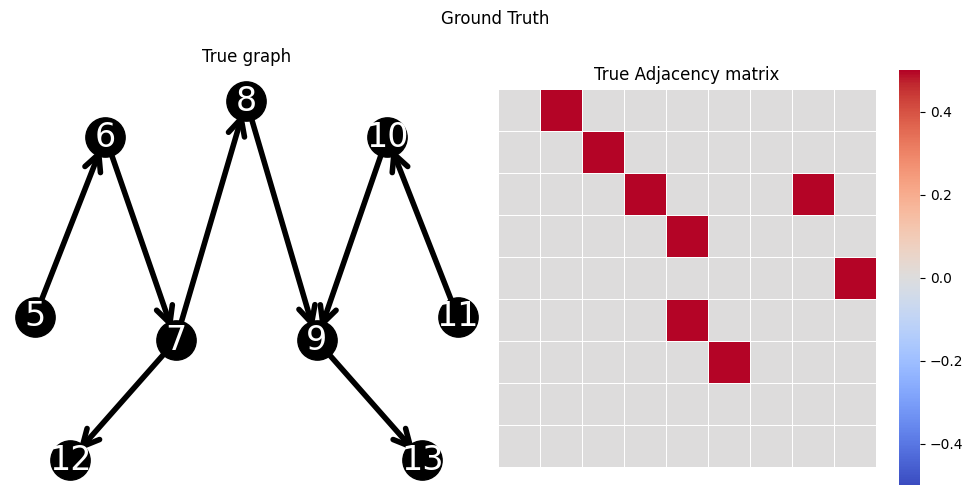

In [46]:
plot_ground_truth(
    A=inter_pmuds.true_network_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    # save_path='intermediate_network_graph.pdf',
)

plot_ground_truth(
    A=inter_pmuds.true_flow_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='intermediate_flow_graph.pdf',
)